## Predictive Model of Productivity in the Garment Industry using Tree Models
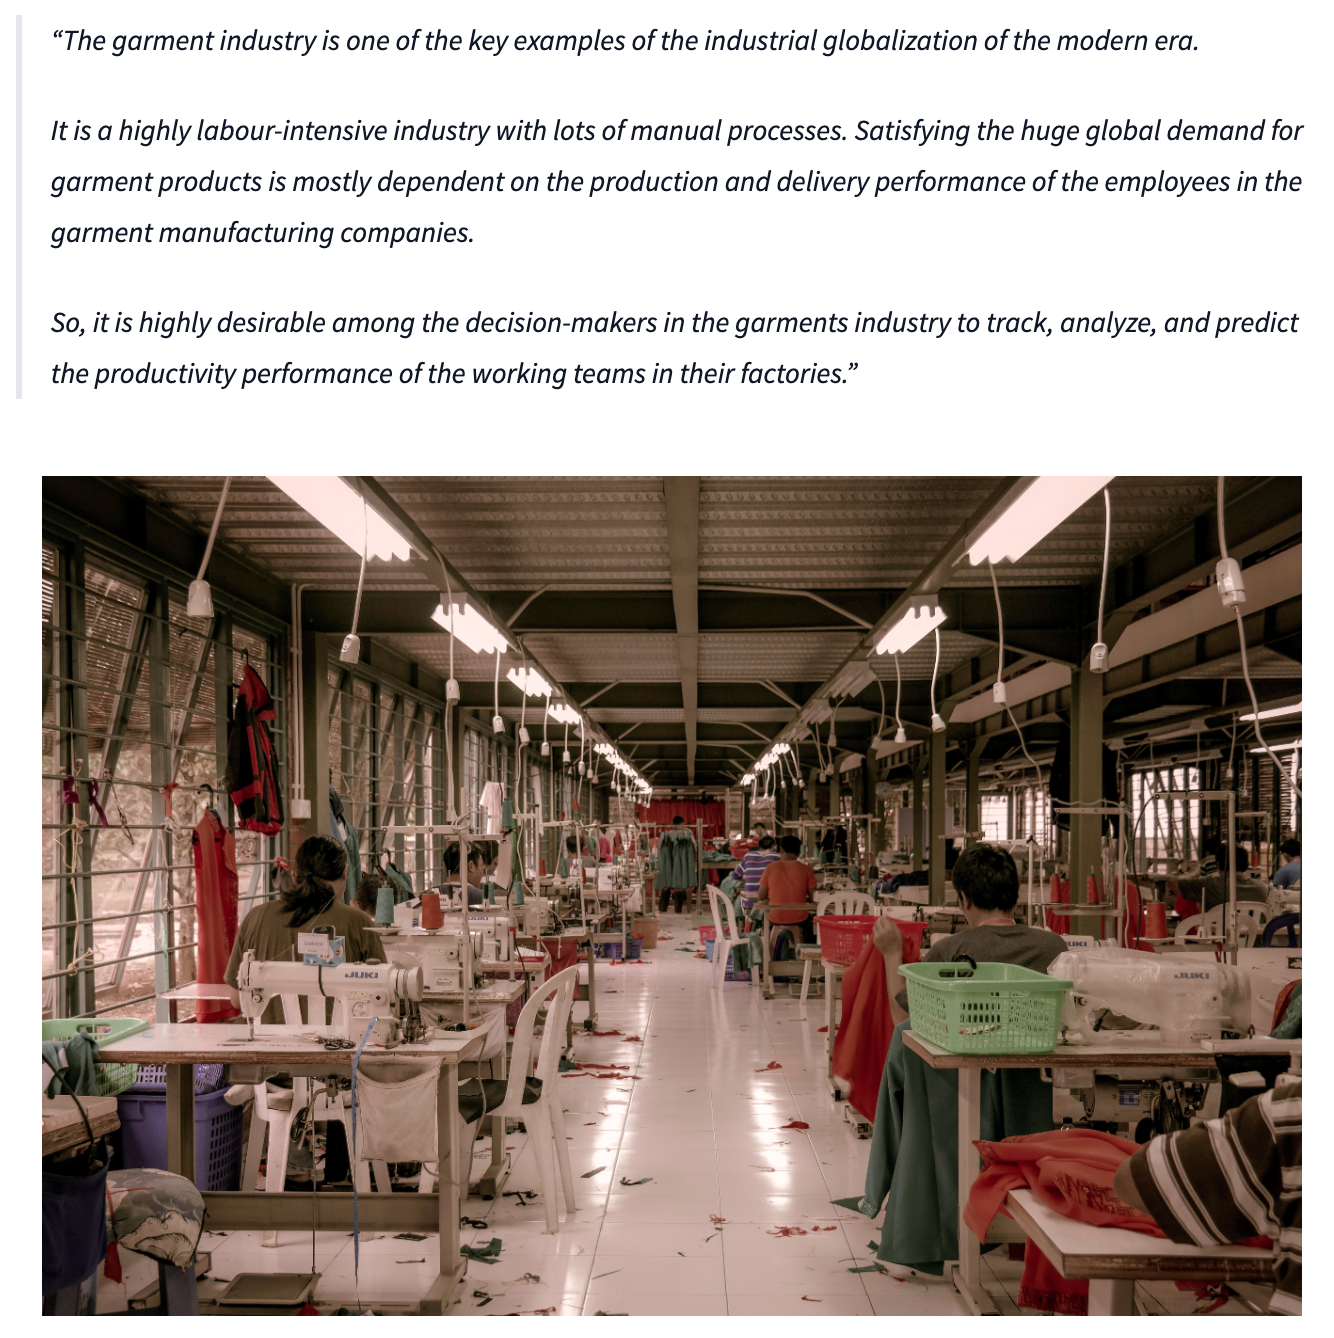

### Project objective:

##### To use decision tree modelling (classifcation) to see if we can determine optimal inputs with respect to a dataset describing productivity measures in the garment industry

##### Can we determine the factors that help us to achieve productivity target?

## What is a decision tree?

A decision tree is like a flow chart that uses true or false logic to make a series of decisions to classify what  might be referred to as an *"outcome"*.

It can help us use historic data to make predictions on future data.

Below is an example of how a simple life decision about making dinner one evening might be modelled using a decision tree

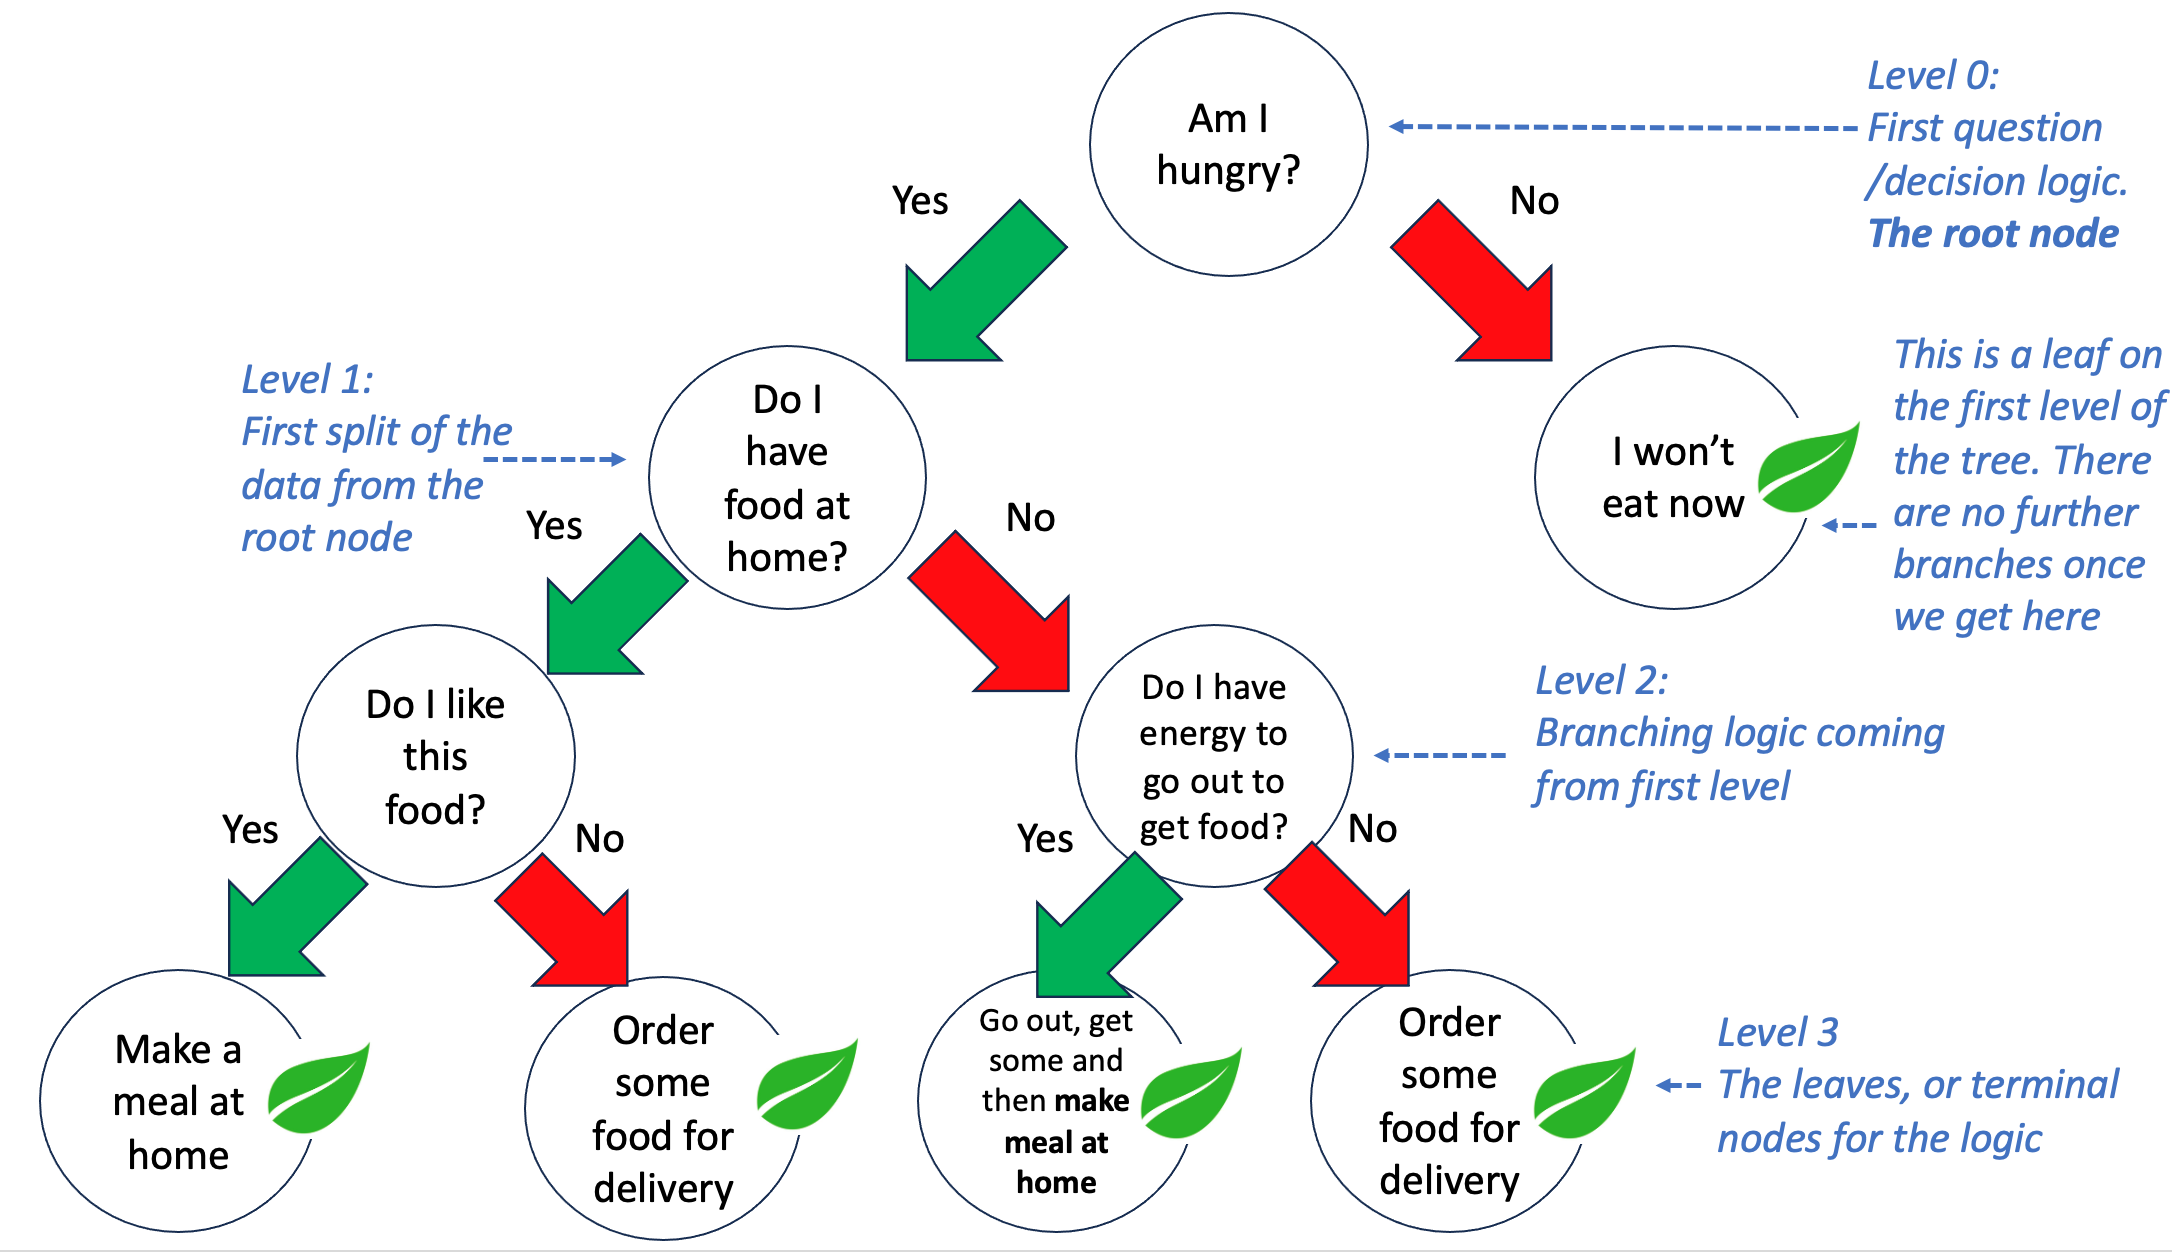

In [1]:
from IPython.display import Image
Image(filename="/Users/iannewman/Desktop/Project_22/Tree_Explainer.png", width=800)

The tree is modelling an approach to making dinner at home at night.

The first question in this decision tree is; "Am I hungry"?

The first question in a decision tree is referred to as a *root node*. In general, each question or decision in the tree is referred to as a *node*. The root node is the starting point of the logic flow of the tree.

The logic branches in two directions. The left branch is for the positive (yes or true) responses or data, the right branch is for the negative (no or false) responses or data.

In the case of "Am I hungry" (root node) when the answer to this is negative (no) we move down the right branch of the tree. The links between nodes are called *branches*. Moving down this branch takes us not to another node with no emerging branches. In effect this is an outcome. It's not another decision that branches left or right and in terminology is referred to a *leaf*. In this instance the outcome is "I won't eat now".

Going back to the root node and looking at the case where the respondant answers yes to "Am I hungry" we move down the left branch and into another decision node that asks; "Do I have food at home?". If the answer is yes we branch left. Answer no and we branch right. Either branch takes us to the second level of the tree.

This branching at each decision node carries on until we arrive at a another leaf, or a node with no question and no further branches. This is how decision trees create models that guide the user of the tree towards a leaf that classifies an outcome.

Applying this logic to data allows us to break down datasets by their features e.g. "are they hungry", or "do they like the food in the fridge" to help us understand the likely outcome or prediction associated with a set of answers or observations.

This tree has 3 levels, in practice more multi-layered trees can be possible to model real world data.

### Import python libraries and data

In [2]:
# Import routine - key libraries needed for analysis

import pandas as pd
import numpy as np
import datetime as dt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV,\
RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, confusion_matrix, ConfusionMatrixDisplay,\
classification_report, multilabel_confusion_matrix, get_scorer_names, make_scorer,\
roc_curve, roc_auc_score, precision_score, recall_score


# Charting libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/iannewman/Desktop/Personal/Python/Projects/Project_22_Employee_Productivity_Tree_Models/Data/garments_worker_productivity.csv')
df.head()                 

date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [4]:
print(f'The data has {df.shape[0]} observations and {df.shape[1]} features')
df.info()

The data has 1197 observations and 15 features
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_pr

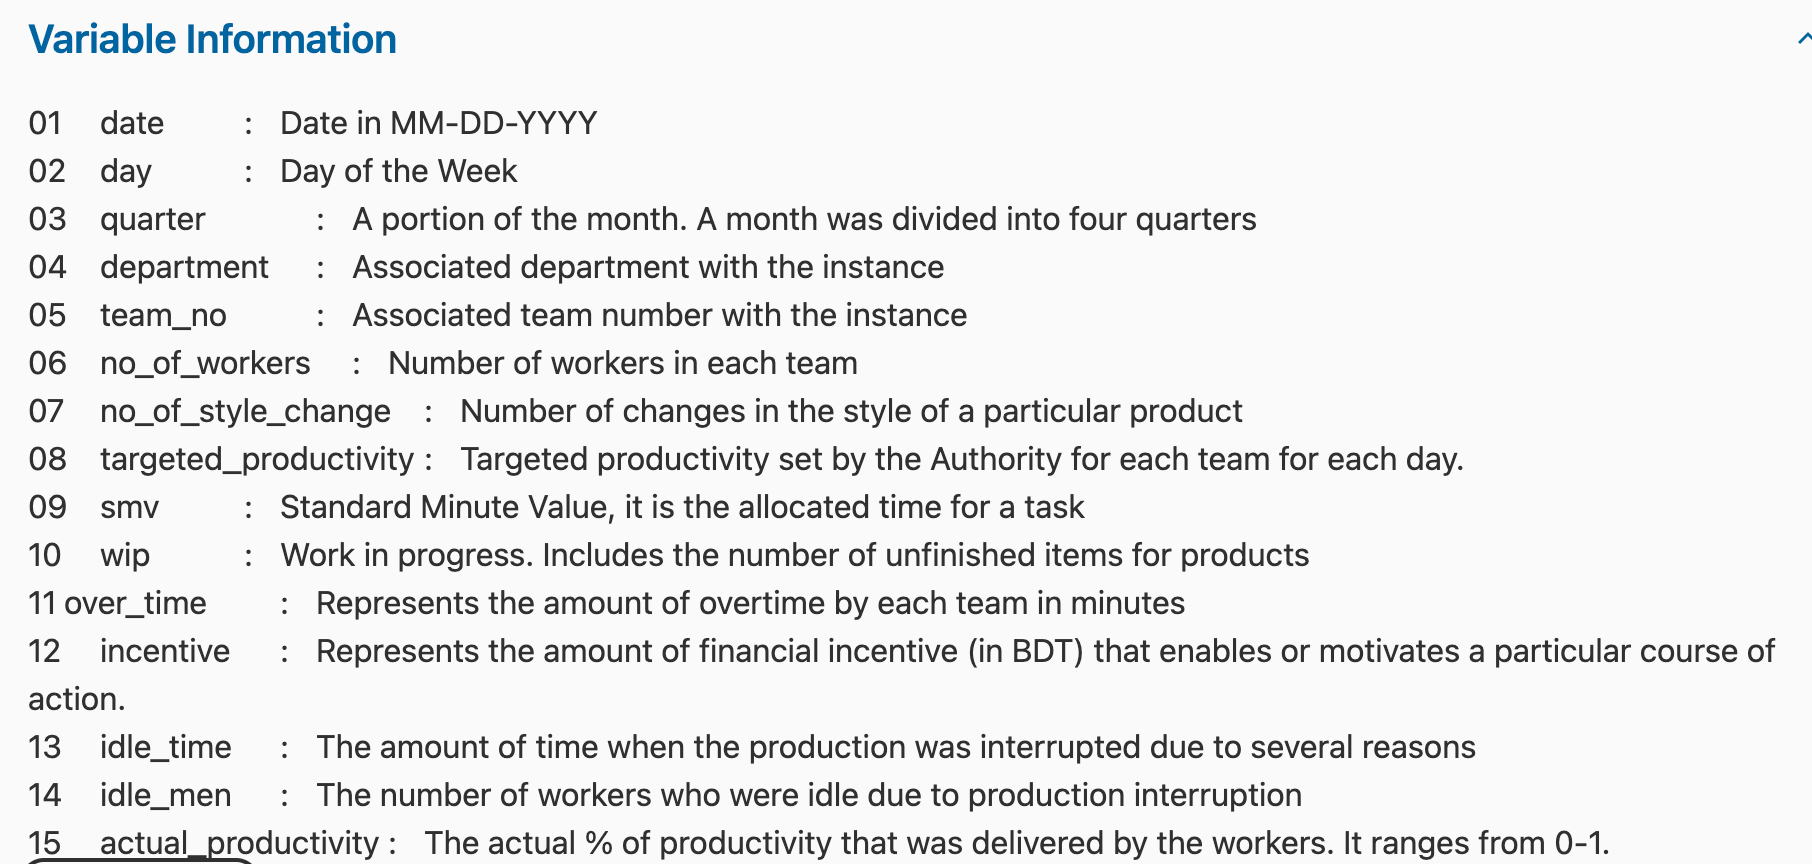

#### From above looks like `wip` has null values 

### Feature classification:

##### Datetime features:
`date`
##### Categorical features:
`day`, `quarter`, `department`, `team_no`
##### Numerical features:
`no_of_style_change`, `no_of_workers`, `targeted_productivity`, `smv`, `wip`, `over_time`, `incentive`, `idle_time`, `idle_men`, `actual_productivity`

In [5]:
df.describe()

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  
count         1197.000000    1197.000000          1197.000000  
mean             0.150376      34.609858             0.735091  
std              0.427848      22.197687             0.174488  
min              0.000000       2.000000             0.233705  
25%              0.000000       9.000000             0.650307  
50%              0.000000      34.000000             0.773333  
75%              0.000000      57.000000             0.850253  
max              2.000000      89.000000             1.120437

### Observations on distribution of numerical features:

`targeted_productivity`, `smv`, `over_time`, `no_of_workers`, `actual_productivity` all look like well populated numerical features

`wip` has minimum of 7 recorded, though has numerous observations with null - clean up exericse may redefine null to zero

`incentive`, `idle_time`, `idle_men` all have a minimum value of 0 and this carries through to the median or upper quartile. Implies sparsely populate features that are mostly null. May still be useful for classification purpose.

## Data clean up
### Examining number of observations across date range in dataset

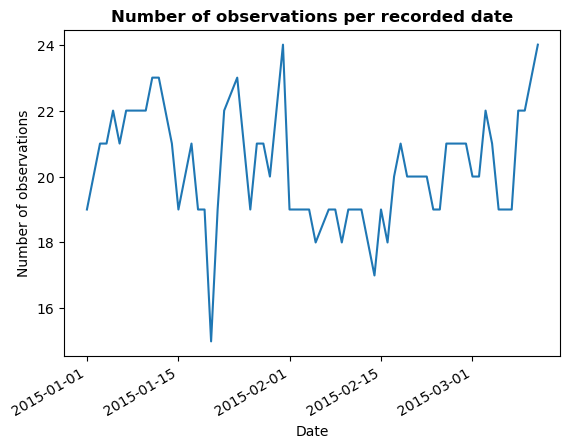

The first observation is recorded on 2015-01-01 00:00:00
The last observation is recorded on 2015-03-11 00:00:00
There are 59 days of data in the dataset spead over a range of 70 days

Mean observations per day: 20.29
Minimum observations per day: 15
Maximum observations per day: 24
Standard deviation of observations per day: 1.74


In [6]:
df_cln = df.copy()
df_cln['date'] = df_cln['date'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y'))
dateline = df_cln.groupby('date')['date'].count()
dateline.plot(kind='line')
plt.title('Number of observations per recorded date', weight='bold')
plt.ylabel('Number of observations')
plt.xlabel('Date')
plt.show()

# derive min, max date and days of data in dataset
min_date = df_cln['date'].min()
max_date = df_cln['date'].max()
days_data = len(dateline)
date_range = (max_date - min_date).days +1 # timedelta object

print(f'The first observation is recorded on {min_date}\n\
The last observation is recorded on {max_date}\n\
There are {days_data} days of data in the dataset spead over a range of {date_range} days')

print(f'\nMean observations per day: {dateline.mean():.2f}')
print(f'Minimum observations per day: {dateline.min():.0f}')
print(f'Maximum observations per day: {dateline.max():.0f}')
print(f'Standard deviation of observations per day: {dateline.std(ddof=0):.2f}')

#### Observations recorded by date:

There are a relatively stable level of observations in the dataset over the period runnning from 01-01-2015 to 11-03-2015. There are 11 days of data missing, these are mostly Fridays.

### Filling zeros in `wip` feature

In [7]:
df_cln['wip'] = df_cln['wip'].fillna(0)
df_cln['wip'].describe()

count     1197.000000
mean       687.228070
std       1514.582341
min          0.000000
25%          0.000000
50%        586.000000
75%       1083.000000
max      23122.000000
Name: wip, dtype: float64

In [8]:
unique_per_feature = {}
for col in df_cln.columns:
    unique_per_feature[col] = len(df_cln[col].unique())
unique_per_feature

{'date': 59,
 'quarter': 5,
 'department': 3,
 'day': 6,
 'team': 12,
 'targeted_productivity': 9,
 'smv': 70,
 'wip': 549,
 'over_time': 143,
 'incentive': 48,
 'idle_time': 12,
 'idle_men': 10,
 'no_of_style_change': 3,
 'no_of_workers': 61,
 'actual_productivity': 879}

### Examining features with 12 or less unique values / categorical variables

In [9]:
# Creeating a listing of the fields with less than 12 unique vals
cat_vars = ['quarter', 'department', 'day', 'team', 'targeted_productivity', 'idle_time', 'idle_men',
        'no_of_style_change']

# displaying what these unqiue vals are for the fields above
cat_vals = {}
for col in cat_vars:
    cat_vals[col] = sorted(list(df_cln[col].unique()))
cat_vals

{'quarter': ['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
 'department': ['finishing', 'finishing ', 'sweing'],
 'day': ['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
 'team': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'targeted_productivity': [0.07, 0.35, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8],
 'idle_time': [0.0,
  2.0,
  3.5,
  4.0,
  4.5,
  5.0,
  6.5,
  8.0,
  90.0,
  150.0,
  270.0,
  300.0],
 'idle_men': [0, 10, 15, 20, 25, 30, 35, 37, 40, 45],
 'no_of_style_change': [0, 1, 2]}

### Clean up and transformations required on variables above
- `quarter`: can be created into a numeric column [1:5] **Transform**
- `department` : looks like 2 real categories in this variable ["sewing","finished] **Clean**
- `day`: every day of week recorded apart from Friday. Transform into number space. **Transform**
#### Leave all other variables as stated

### Perform clean up and transformations

In [10]:
df_cln['quarter'] = df_cln['quarter'].str.replace('Quarter', '', regex=False).astype('int')

df_cln['department'] = df_cln['department'].str.replace(' ', '',regex=False).str.replace('swe','sew',regex=False)

day_mapper = {'Saturday' : 0,'Sunday': 1,'Monday' : 2,'Tuesday' : 3,'Wednesday' : 4,'Thursday' : 5}
df_cln['dow'] = df_cln['day'].apply(lambda x : day_mapper[x])

## Exploratory Data Analysis

#### Investigating the  `actual_productivity` feature - a key component of target outcome

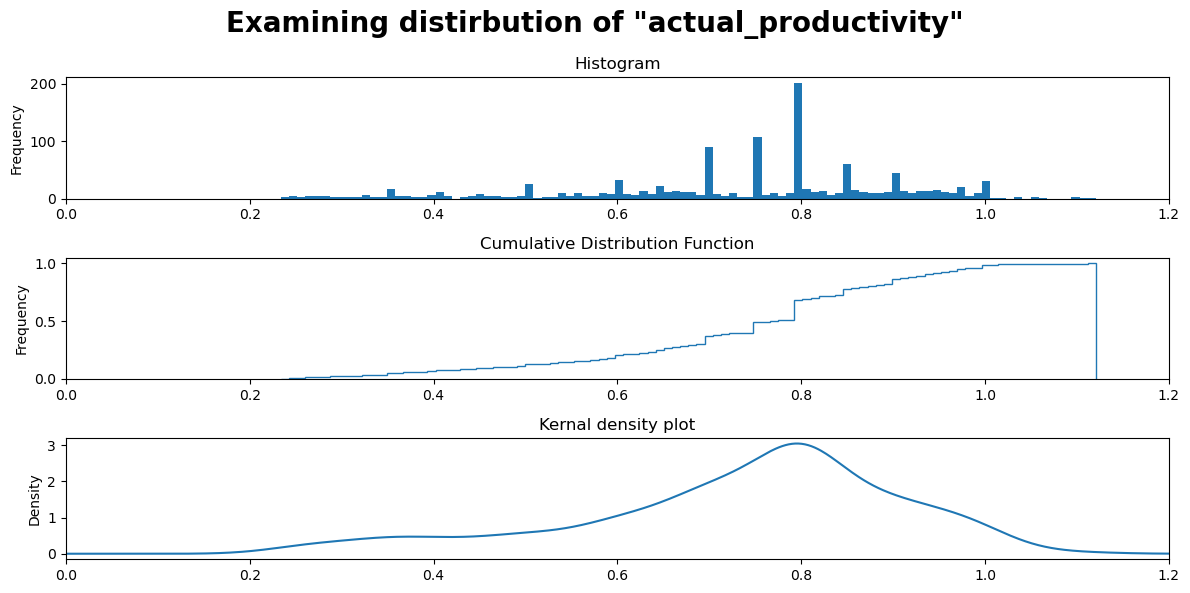

actual_productivity
distrubtional metrics
--------------
Minimum: 0.23
Maximum: 1.12
Mode: 0.80
Median: 0.77
Mean: 0.74
Standard Deviation: 0.17


In [11]:
fig, ax = plt.subplots(3,1, figsize=(12,6))

fig.suptitle('Examining distirbution of \"actual_productivity\"', fontsize=20, fontweight='bold')

# Histogram
ax0 = df_cln['actual_productivity'].plot(kind='hist', ax=ax[0], bins=100)

# Cumulative dist function
ax1 = df_cln['actual_productivity'].plot(kind='hist', ax=ax[1], cumulative=True, density=1,
                                         bins=100, histtype='step')
# kernal density plot
ax2 = df_cln['actual_productivity'].plot(kind='kde', ax=ax[2])

chart_titles = {0 : 'Histogram', 1 : 'Cumulative Distribution Function', 2 : 'Kernal density plot'}

for i in range(3):
    ax[i].set_xlim([0,1.2])
    ax[i].set_title(chart_titles[i])

plt.tight_layout()
plt.show()

print('actual_productivity\ndistrubtional metrics\n--------------')
print(f"Minimum: {df_cln['actual_productivity'].min():.2f}")
print(f"Maximum: {df_cln['actual_productivity'].max():.2f}")
print(f"Mode: {df_cln['actual_productivity'].mode()[0]:.2f}")
print(f"Median: {df_cln['actual_productivity'].median():.2f}")
print(f"Mean: {df_cln['actual_productivity'].mean():.2f}")
print(f"Standard Deviation: {df_cln['actual_productivity'].std(ddof=0):.2f}")

##### actual_productivity is somewhat negatively skewed

### Boxplots of `actual_productivity` in relation to categorical variables

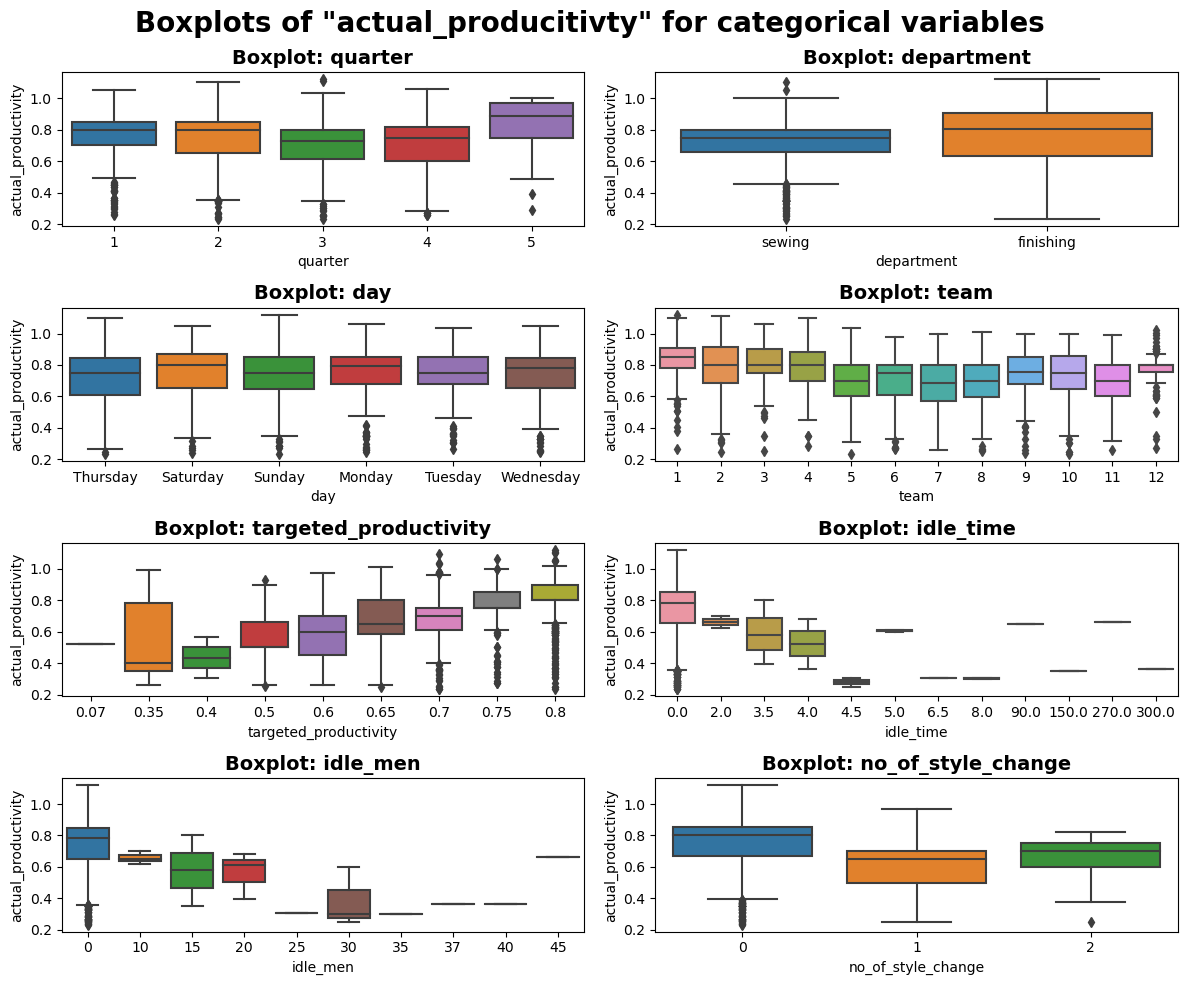

In [12]:
# cat_vars defined above

fig, ax = plt.subplots(4,2, figsize=(12,10))
ax = ax.flatten()

fig.suptitle('Boxplots of \"actual_producitivty\" for categorical variables ',
            fontsize=20, fontweight='bold')

for i, cat in enumerate(cat_vars):
    sns.boxplot(x=cat, y='actual_productivity', data=df_cln, ax=ax[i])
    ax[i].set_title(f"Boxplot: {cat}", fontsize=14, weight='bold')
    
# ax[5].axis('off')

plt.tight_layout()
plt.show()

### Comment: Distribution of `actual_productivity` across categorical variables

- `quarter`: Value 5 (last week of month) has increased median productivity relative to other quarters.
- `department`: 'finishing' has a higher median level of `actual_productivity` than the 'sewing' category, though there is greater dispersion in actual_productivity in the 'finishing' category than in the 'sewing' category which may impair it's classification of actual productivity.
- `day`: no obvious pattern across the days of week.
- `team`: teams 1 through 4 have greater median productivity than is recorded for teams 5 through 8
- `targeted_productivity`: There is a clear positive correlation between targeted and actual productivity
- `idle_time`: the presence of non-zero idle_time is associated with lower quartile levels of productivity
- `idle_men`: similar to `idle_time`, non-zero idle men is associated with lower quartile productivity
- `no_of_style_change`: non-zero for this variable is associated with lower levels of productivity

##### Some transformation of the variables above may improve their classification ability. Possible transformations might be:
- `quarter` becomes `is_quarter5` to indicate shifts in last day of month with higher associated productivity
- `idle_time` becomes `idle_time_1` to indicate presence of idle time (non-zero values)
- `idle_men` becomes `idle_men_1` to indicate presence of idle men (non-zero values)
- `no_of_style_change` becomes `style_change_1` to indicate presence of at least one style change

### Investigating `team` to transform into a binary classifier; `prod_team`:

In [13]:
print(f"Mean \"actual_prodcutivity\" across dataset: {df_cln['actual_productivity'].mean():.4f}")

Mean "actual_prodcutivity" across dataset: 0.7351


#### Appears that teams 1 through 4 and 12 all have mean `actual_productivity` greater than 0.77. Creating a variable that indicates membership of these more productive teams seems a useful addition to the classifier model 

### Numeric variables in relation to actual productivity 

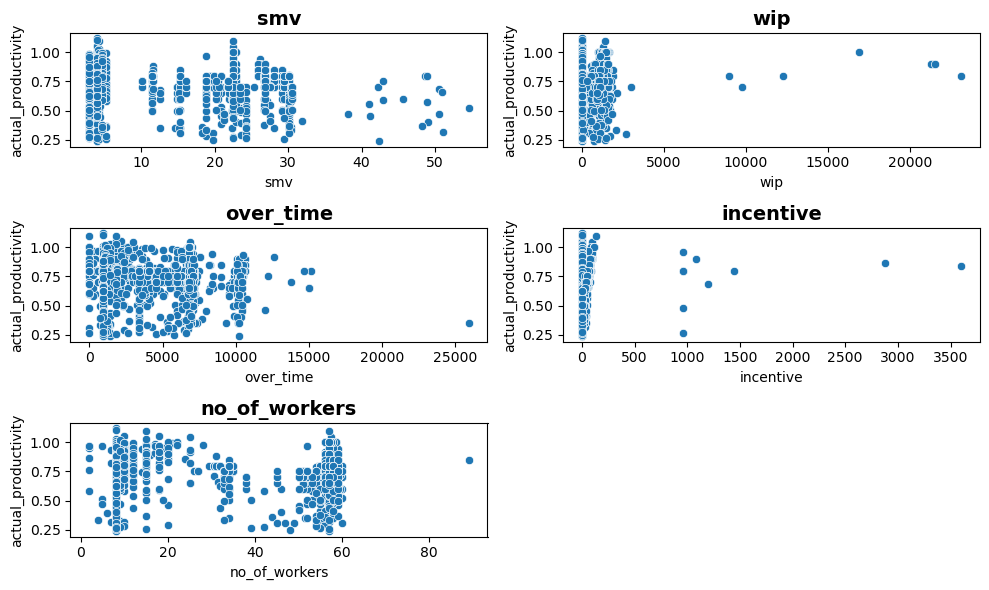

In [14]:
numeric_vars = ['smv', 'wip', 'over_time', 'incentive', 'no_of_workers']

fig, ax = plt.subplots(3,2, figsize=(10,6))
ax=ax.flatten()

for i, var in enumerate(numeric_vars):
    sns.scatterplot(data=df_cln, x=var, y='actual_productivity', ax=ax[i])
    ax[i].set_title(var, fontsize=14, fontweight='bold')
    
ax[5].axis('off')

plt.tight_layout()
plt.show()

### Comment:

There is little evidence to indicate that any of these numeric variables are particularly strongly correlated with productivity

### What is the target variable for the classification problem?

An interesting question might be; do we achieve targeted productivity?
### Suggests creation of a binary classification, *yes* or *no*, to; **"Did we meet productivity target?"**

## Let's perform some of the transformations discussed with respect to the categorical variables and define the binary target variable for classification

In [15]:
df_mod = df_cln.copy()
df_mod['prod_team'] = np.where((df_mod['team']<5) | (df_mod['team']==12), 1, 0)
df_mod['is_finishing'] = np.where(df_mod['department']=='finishing', 1, 0)
df_mod['is_quarter5'] = df_mod['quarter'].apply(lambda x: 1 if x == 5 else 0)
df_mod['idle_time_1'] = df_mod['idle_time'].apply(lambda x: 1 if x>0 else 0)
df_mod['idle_men_1'] = df_mod['idle_men'].apply(lambda x: 1 if x>0 else 0)
df_mod['style_change_1'] = df_mod['no_of_style_change'].apply(lambda x: 1 if x>0 else 0)
df_mod['target'] = np.where(df_mod['actual_productivity'] >= df_mod['targeted_productivity'], 1, 0)
# drop cols that the transformations replace
df_mod = df_mod.drop(['date', 'day', 'dow', 'team', 'department', 'quarter',
                      'idle_time', 'idle_men', 'no_of_style_change'], axis=1)
df_mod.describe()

targeted_productivity          smv           wip     over_time  \
count            1197.000000  1197.000000   1197.000000   1197.000000   
mean                0.729632    15.062172    687.228070   4567.460317   
std                 0.097891    10.943219   1514.582341   3348.823563   
min                 0.070000     2.900000      0.000000      0.000000   
25%                 0.700000     3.940000      0.000000   1440.000000   
50%                 0.750000    15.260000    586.000000   3960.000000   
75%                 0.800000    24.260000   1083.000000   6960.000000   
max                 0.800000    54.560000  23122.000000  25920.000000   

         incentive  no_of_workers  actual_productivity    prod_team  \
count  1197.000000    1197.000000          1197.000000  1197.000000   
mean     38.210526      34.609858             0.735091     0.428571   
std     160.182643      22.197687             0.174488     0.495079   
min       0.000000       2.000000             0.233705     0.000000   
25%       0.000000       9.000000             0.650307     0.000000   
50%       0.000000      34.000000             0.773333     0.000000   
75%      50.000000      57.000000             0.850253     1.000000   
max    3600.000000      89.000000             1.120437     1.000000   

       is_finishing  is_quarter5  idle_time_1   idle_men_1  style_change_1  \
count   1197.000000  1197.000000  1197.000000  1197.000000     1197.000000   
mean       0.422723     0.036759     0.015038     0.015038        0.122807   
std        0.494199     0.188247     0.121753     0.121753        0.328353   
min        0.000000     0.000000     0.000000     0.000000        0.000000   
25%        0.000000     0.000000     0.000000     0.000000        0.000000   
50%        0.000000     0.000000     0.000000     0.000000        0.000000   
75%        1.000000     0.000000     0.000000     0.000000        0.000000   
max        1.000000     1.000000     1.000000     1.000000        1.000000   

            target  
count  1197.000000  
mean      0.730994  
std       0.443628  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

### Generate correlation heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

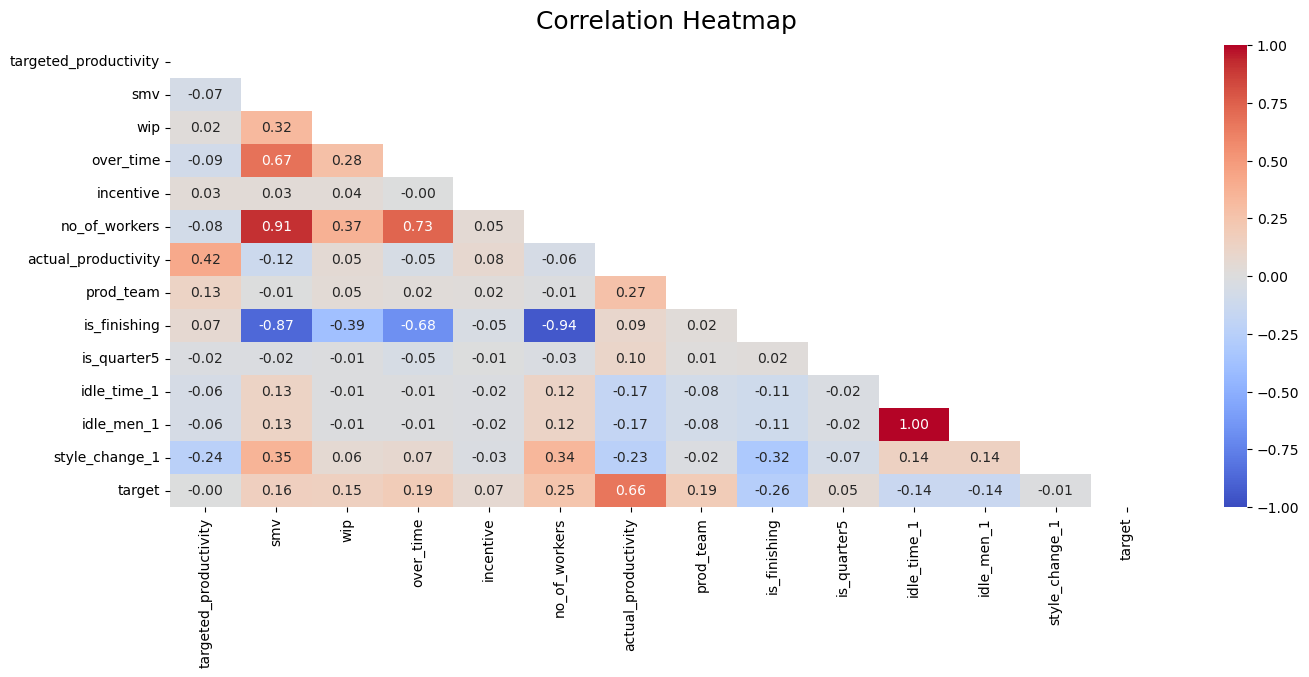

In [16]:
# generate correlation matrix
corr_matrix = df_mod.corr(numeric_only=True)

# create plot area and plot
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(corr_matrix))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2f')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

It does not appear that many variables past `actual_productivity` - which is part of the target definition, are strongly correlated with the target.

### Create train and test data for classification decision tree model

In [17]:
X = df_mod.drop(['target', 'actual_productivity'], axis=1)
y = df_mod['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

### Instantiate, fit and score simple 3 level classification tree

In [18]:
dectree_class = DecisionTreeClassifier(max_depth=3, random_state=33)
dectree_class.fit(X_train, y_train)
print(f"The simple classification tree has an accuracy of: {dectree_class.score(X_test, y_test):.2%}")

The simple classification tree has an accuracy of: 83.33%


### Visualise Tree
#### *Chart feature importance*

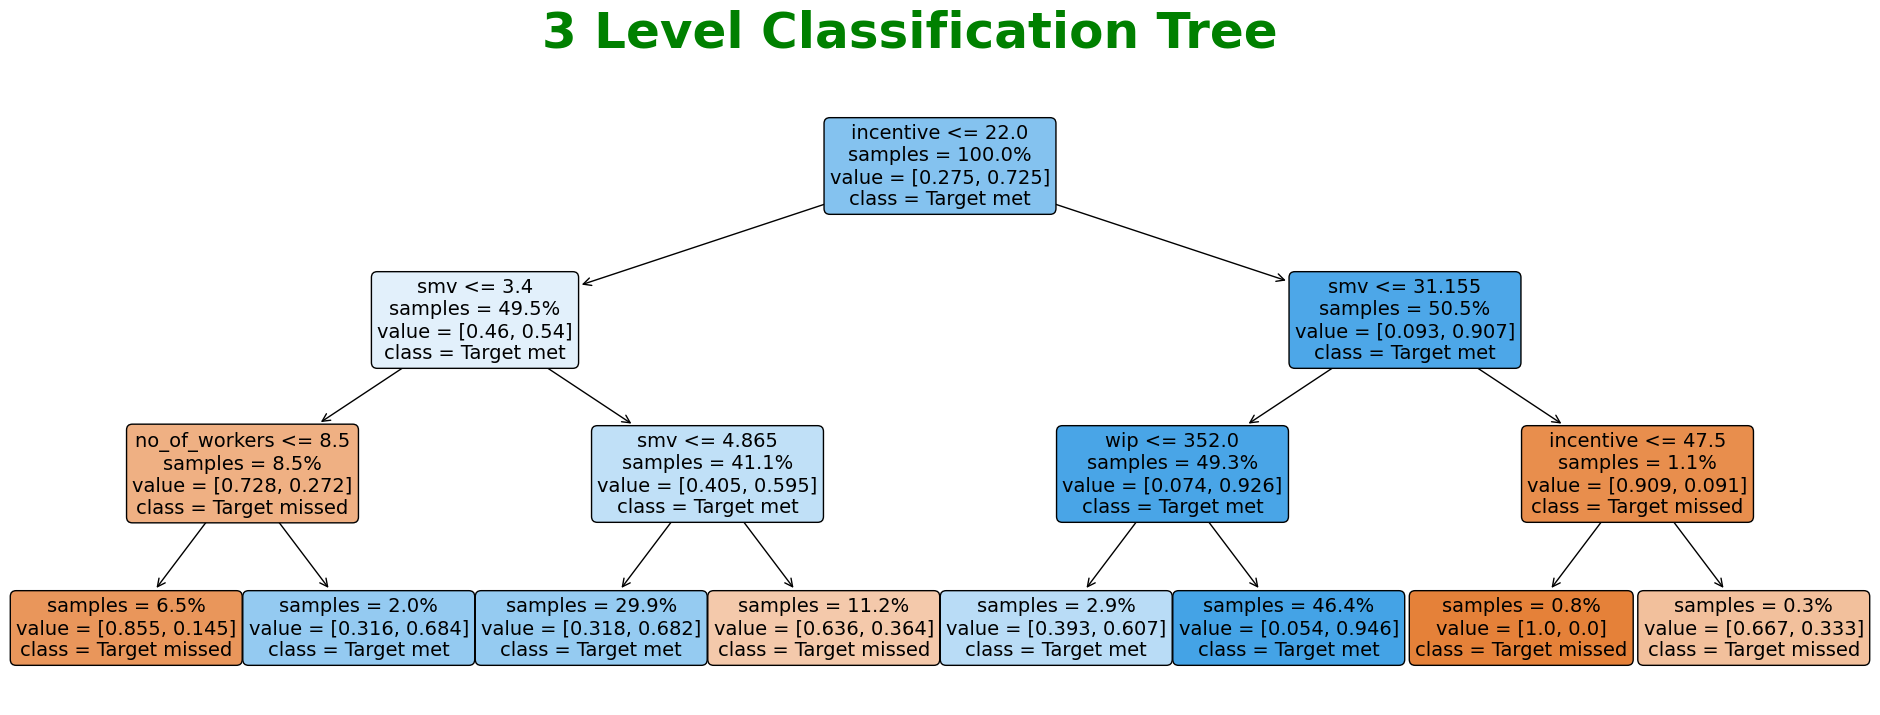

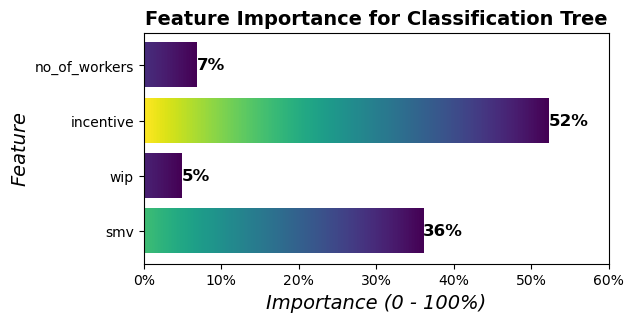

In [19]:
# Visualise tree model
def plot_dectree():
    fig, ax = plt.subplots(figsize=(24,8))
    fig.suptitle('3 Level Classification Tree', color='green', fontsize=36, fontweight='bold')
    _ = plot_tree(dectree_class,
                  feature_names = dectree_class.feature_names_in_,
                  class_names = ['Target missed', 'Target met'],
                  impurity = False,
                  filled=True,
                  proportion=True,
                  precision=3,
                  rounded=True,
                  fontsize=14)
    plt.show()
plot_dectree()

# Function to add colormap gradient to bars 
def gradientbars(bars, data, cmap):
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        grad = np.atleast_2d(np.linspace(0,1*w/max(data),256))
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1,
                  norm=mpl.colors.NoNorm(vmin=0,vmax=1), cmap=plt.get_cmap(cmap), )
    ax.axis(lim)

# Function to create importance chart for tree model
def imp_chart(model, chart_title, figsize=(6,3), cmap='viridis', title_color='black',label_color='black'):
    
    # creat feature and importance list
    imp_features = []
    importances = []
    for importance, feature in zip(model.feature_importances_, model.feature_names_in_):
        if importance!=0:
            importances.append(importance)
            imp_features.append(feature)
        
    # create plot area, plot and format plot    
    fig, ax = plt.subplots(figsize=figsize)
    imp_chart = ax.barh(imp_features, importances)
    ax.set_xlabel("Importance (0 - 100%)", size=14, style='italic')
    ax.set_xticks([i/10 for i in range(0,7)], ['0%', "10%", "20%", "30%", "40%", "50%", "60%"])
    ax.set_ylabel("Feature", size=14, style='italic')
    ax.set_title(chart_title, size=14, weight='bold', color=title_color)
    
    # remove features with zero importance
    labels = [f"{x:.0%}" if x!=0  else '' for x in importances]

    # Apply data labels to bars    
    for i in ax.containers:
        ax.bar_label(i, labels=labels, label_type='edge', size=12, fontweight='bold', color=label_color)

    gradientbars(imp_chart, importances , cmap)
    plt.show()
    return imp_features, importances 

# Use function to create importance chart for tree model
chart_title = "Feature Importance for Classification Tree"
dectree_feat_imp = imp_chart(dectree_class, chart_title, figsize=(6,3), cmap='viridis', title_color='black',
                             label_color='black')

### Decsribing the decision tree

#### `incentive`
- The tree starts off with `incentive`, the cash incentive paid to workers, at its root node. This gives `incentive` central importance in the model's overall explanatory power. You can see from the samples figure at the root node that we're working with 100% of the data the model is trained on before we use `incentive` to split the data. 
- The values for the whole dataset at the root node show that 0.275 or 27.5% of the observations at the root node recorded productivity below target and the remaining 72.5% of the data with productivity at or in excess of target productivity. 
- The root node splits the data into those with `incentive` of 22 BDT or less branching left. An incentive of more branches right. When we look at the nodes on both sides of root node we can see they contain approximately 50% of the data. The `incentive` decision node at the root of this tree effectively splits the data in the overall sample in half.
- From the feature importance chart (below the tree visualisation) we can see that incentive accounted for 52% of the improvement in the ability to classify data into more homogenous groups. `incentive` appears later on the right side of the decision tree again.  

#### `smv` and `no_of_workers`
- The second most important feature in the model is `smv`, the amount of time allocated to a task. It is present on both sides of the tree immediately below the root node. The feature importance chart shows `smv` represents 36% of the improvement in clasification ability of the tree model.
- Staying on the left side of the tree, carrying on from the from the root node, the data splits around whether the time allocated to a task (`smv`) is less than or equal to 3.4 minutes.
- Carrying on left, for tasks that take 3.4 minutes or less to complete, we arrive at a node asking us if the number of workers (`no_of_workers`) on the task is less than or eqaul to 8. `no_of_workers` is the third most important feature of the tree.
- Branching left from `no_of_workers` (above) brings us to a leaf node where the values show 0.855 of the sample at this node had an outcome of productivity below target.

##### *So an insight at this leaf might be*
Where;
- the incentive is less than or equal to 22 BDT
- the allocated time for a task is less than or equal to 3.4 minutes
- and the number of people assigend to the task is less than or equal to 8
##### 85.5% of the data in this circumstance is associated with failing to meet productivity target

You can work through the rest of the decsion tree to examine the insights in this way at the other leaves

#### `wip`
One remaining feature the model uses in it's decision logic is `wip`. This is the amount of units of production started but not finished at the end of the shift - part completed work.

The tree below has been edited to highlight the branching decison logic that uses the `wip` variable to take the tree to a leaf node conclusion.

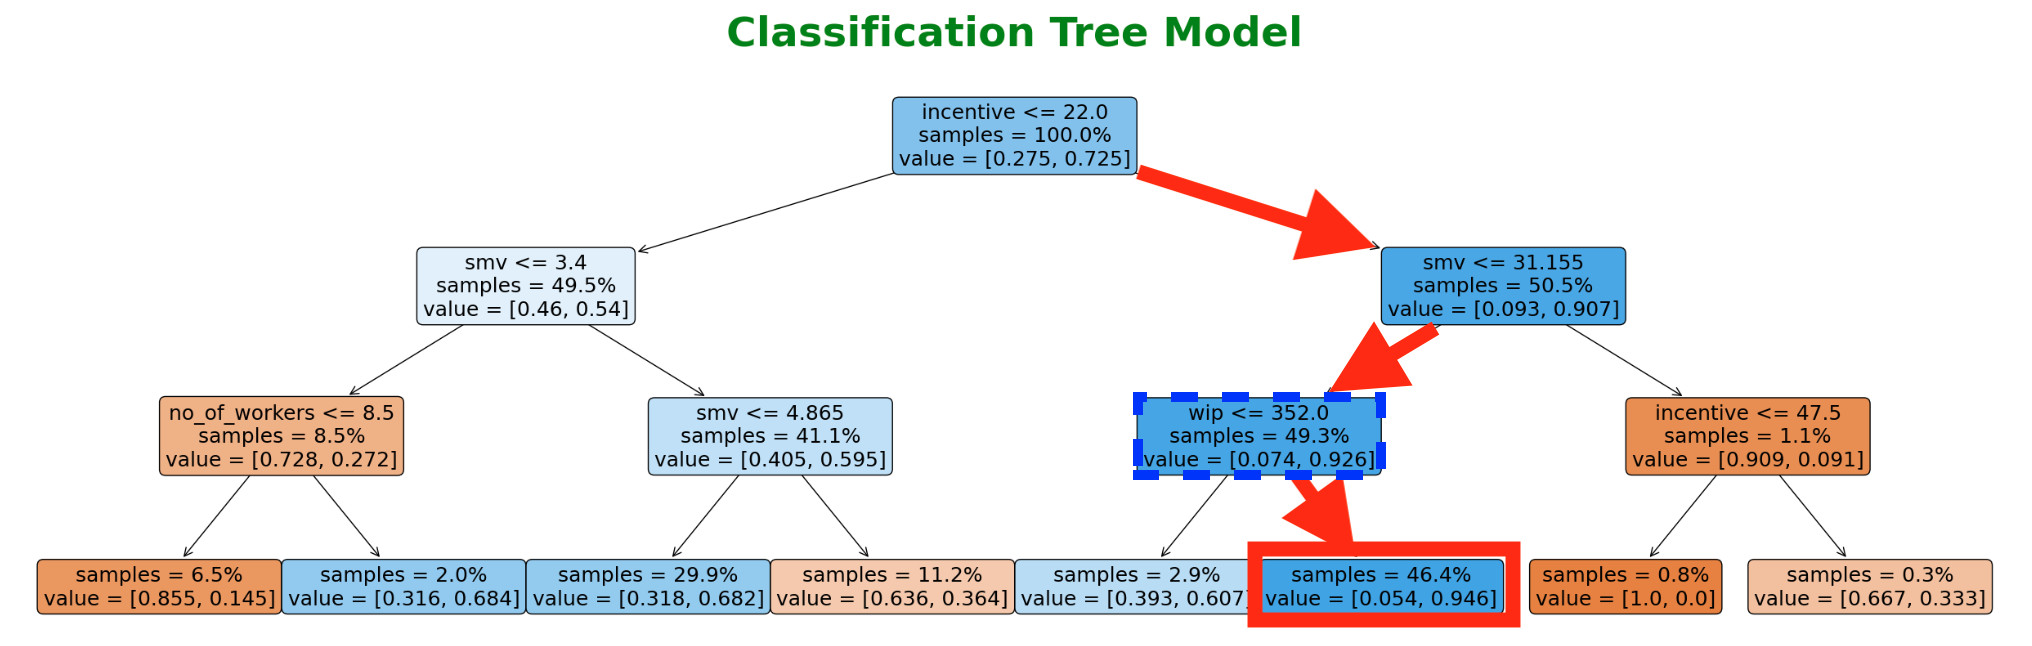

Following the branches of decision logic from root to leaf node where;
- the employee cash `incentive` is greater than 22 BDT
- `smv` is less than 31.15 minutes (time taken to produce a unit of product)
- and the `wip` is greater than 352 part finished garments
##### 94.6% of these observsations had activity greater than or equal to targeted productivity

#### Final thoughts
- None of the transformed variables ( `prod_team`, `is_finishing`, `is_quarter5`, `idle_time_1`, `idle_men_1`, `style_change_1`) produced in the exploratory data analysis are relevant in this classifcation tree model.
- It also wasn't obvious to me from the exploratory data analysis that a variable like `incentive` or `smv`, which are weakly correlated to target, would be be such an important predictor of outcome.

- This model has been limited to a 3 level decision tree to prevent overfitting of the data. Overfitting is where the training model learns the detail of the training data rather the generality of the pattern within the  training data. Overfitting can mean models perform well using the trainig data but poorly on unseen or test data. We'll examine model accuracy in the next section. 

### Model Accuracy

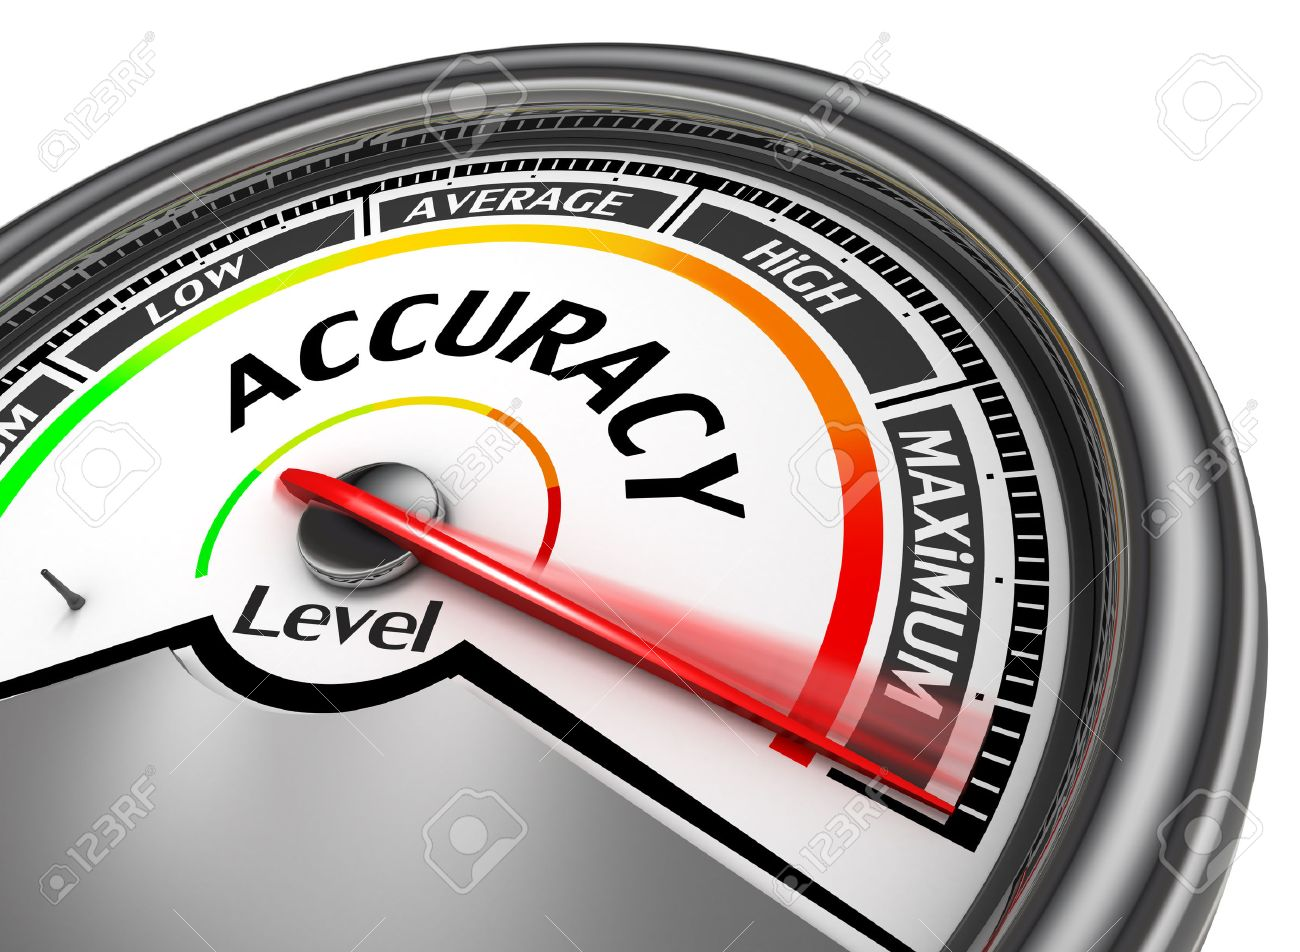

In [20]:
Image(filename="/Users/iannewman/Desktop/Project_22/Accuracy.jpg", width=500)

Earlier we noted that the 3 level decision tree model we constructed had 83.33% accuracy. I said nothing more than that.

I'm going to use the diagram below, referred to as a confusion matrix to explain what this means. *(Image source: Medium)*

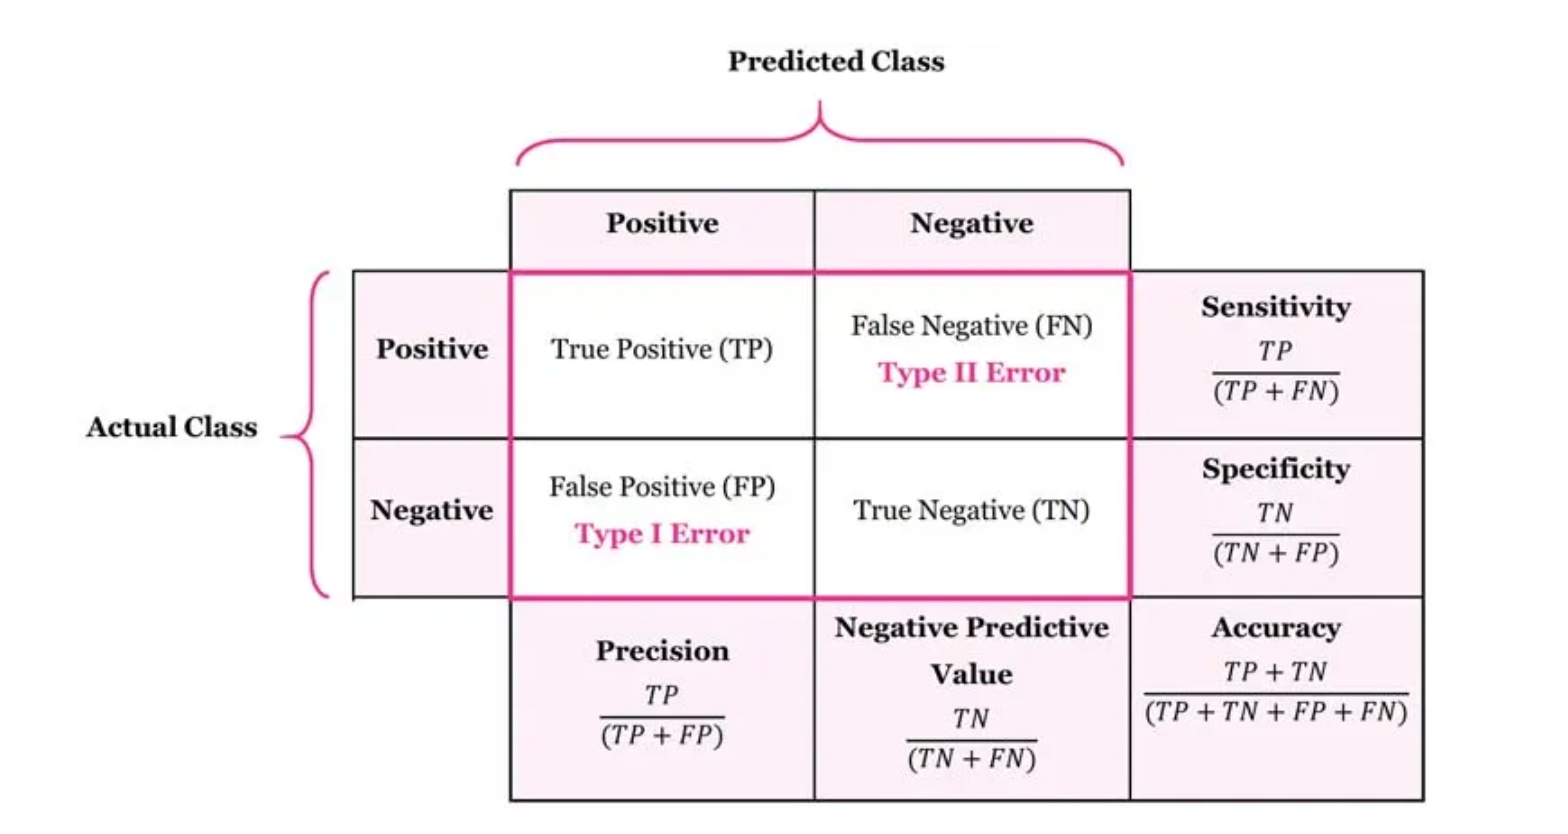

In [21]:
Image(filename="/Users/iannewman/Desktop/Project_22/Explainer_Confusion_Matrix.png", width=700)

### Accuracy and the confusion matrix:
The decision tree model we're using predicts (0 / negative) production didn't meet target or (1 / positive) production met target. Accuracy compares the number of times these predictions were correct in the training data. 

Every time the model predicted production target was met (1) and in reality it was met this is called a *True Positive*

If the model predicted the target wasn't met (0) and in reality it wasn't met we have a *True Negative*

The sum of true positive and true negative gives us the number of times that the model predicted or classified the data correctly.

We're also rightly concerned with when the model got the prediction wrong - this gives us a sense of *Accuracy*, hence the name.

There are two type of error in this classification problem in the confusion matrix above.

**Type I error** (pronounced type 1)
This is when the model predicts a postive outcome, that production meets target and in reality the observation was negative, production didn't meet target. This is called a *False Positive*.

**Type II error** (pronounced type 2)
This is when the model predicts a negative outcome, that production target is missed, but, in reality the target is met. This is called a *False Negative* 

Accuracy is the sum of the true predictions divided by total number of predictions including the errors (recorded in the matrix above). This gives a proportion or percentage of how many times the model correctly predicted outcomes out of all the predictions made by the model.

#### *Another question we're likely to be interested in is whether the model is more or less accurate with predicting positive or negative outcomes*

- **Precision** Out of all the positive predictions, what proportion were right?
- **Sensitivity aka Recall** looks at it from the data side. Given that I know (recall) the data is positive, what proportion of the positive data did the model classify correctly?

Where precision and recall concern positive predictions and data, *negative predictive value* and *specificity* are their respective equivalents for negative predictions and data.

- **Negative Predictive Value** out of all the negative predictions, what proportion were right?
- **Specificity** Given I know the data is negative, what proportion of the negative data was classified correctly.

#### With this primer we'll examine the accuracy of the model

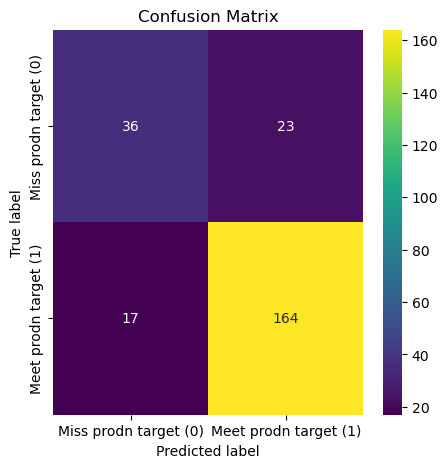

Accuracy: 0.83
Precision: 0.88
Recall: 0.91
Negative predictve value: 0.68
Specificity: 0.61


In [22]:
# Generate model predictions and the associated confusion matrix 
dectree_class_pred = dectree_class.predict(X_test)
dtree_confus = confusion_matrix(list(y_test), list(dectree_class_pred))

# Use function to plot confusion matrix
def plot_confusion_matrix(cm, labels, cmap='Blues'):
    # Calculate figure size
    fig_size = len(labels) * 2.5
    plt.figure(figsize=(fig_size, fig_size))

    # Create confusion matrix heatmap
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap=cmap)

    # Add labels and title
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')

    # Show plot
    plt.show()

# lable plot data and plot confusion matrix
cm_labels = ['Miss prodn target (0)', 'Meet prodn target (1)']
plot_confusion_matrix(dtree_confus, cm_labels, cmap='viridis')

# Use function to create accuracy scores for given confusion matrix
def class_scores(cm):
    tn = cm[0][0]
    tp = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    npv = tn/(tn+fn)
    specificity = tn/(tn+fp)                
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'Negative predictve value: {npv:.2f}')
    print(f'Specificity: {specificity:.2f}')
    return accuracy, precision, recall, npv, specificity

# Visualise confusion matrix and scores 
dtree_scores = class_scores(dtree_confus)

## Comment: Accuracy

#### - The model is better at predicting the positive class, productivity meets target, than it is at predicting the negative class (productivity less than target). Precision was 0.88 compared to negative predictive value of 0.68.
#### - With respect to known known data, the model is better at classifying positive data than negative with recall of 0.91 compared to specificty of 0.61

### This model is restricted to 3 levels, let's see if we can optimise accuracy using a couple of different methods, the first of which is referred to as cost complexity pruning.

## Cost complexity pruning (optimisation)

- Cost complexity pruning is a method of optimisation that generates multiple subtrees under the root node or starting point and evaluates the impurity or rate of misclassification in the the leaves or terminal nodes of each subtree.
- The algorithm sums the impurity of each set of leaves for a given subtree and then adds the number of leaves times a factor referred to as alpha (or ccp_alpha)
- It uses this calculation to find the subtree with the lowest level of impurity or misclassification. The formula for this is below.
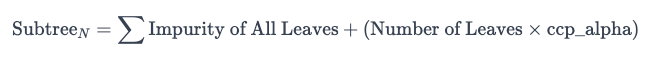
  
- It can be seen that the greater the alpha the more leaves and ultimately nodes that are *pruned* or removed from the tree
- The objective trade off is to look at the accuracy score in the training data relative to potential choices for alpha

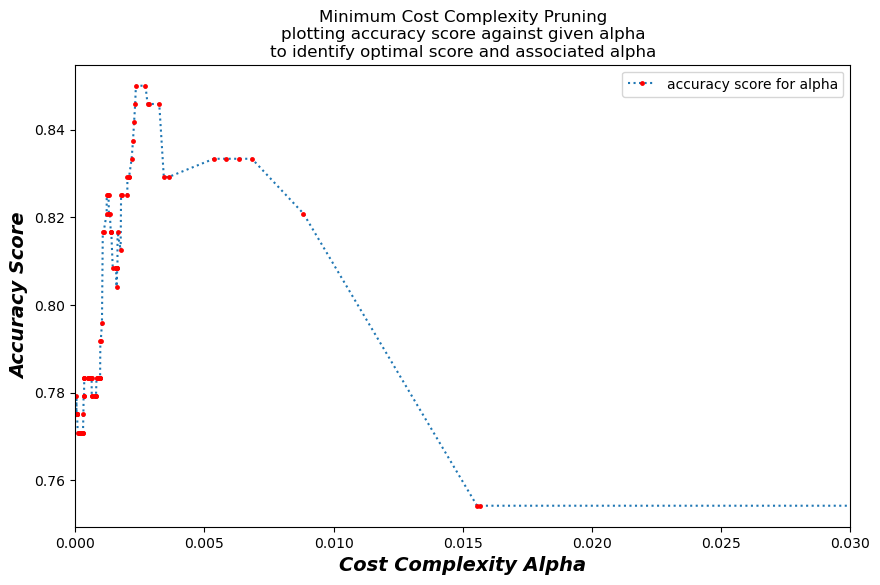

The optimal ccp_alpha for the decision tree is 0.0023
This produces an accuracy score on training data of 0.8500
The model produces an accuracy score on test data of: 0.85

Visualisation of optimal classification tree following
minimum cost-complexity optimisation
-------------------------------------


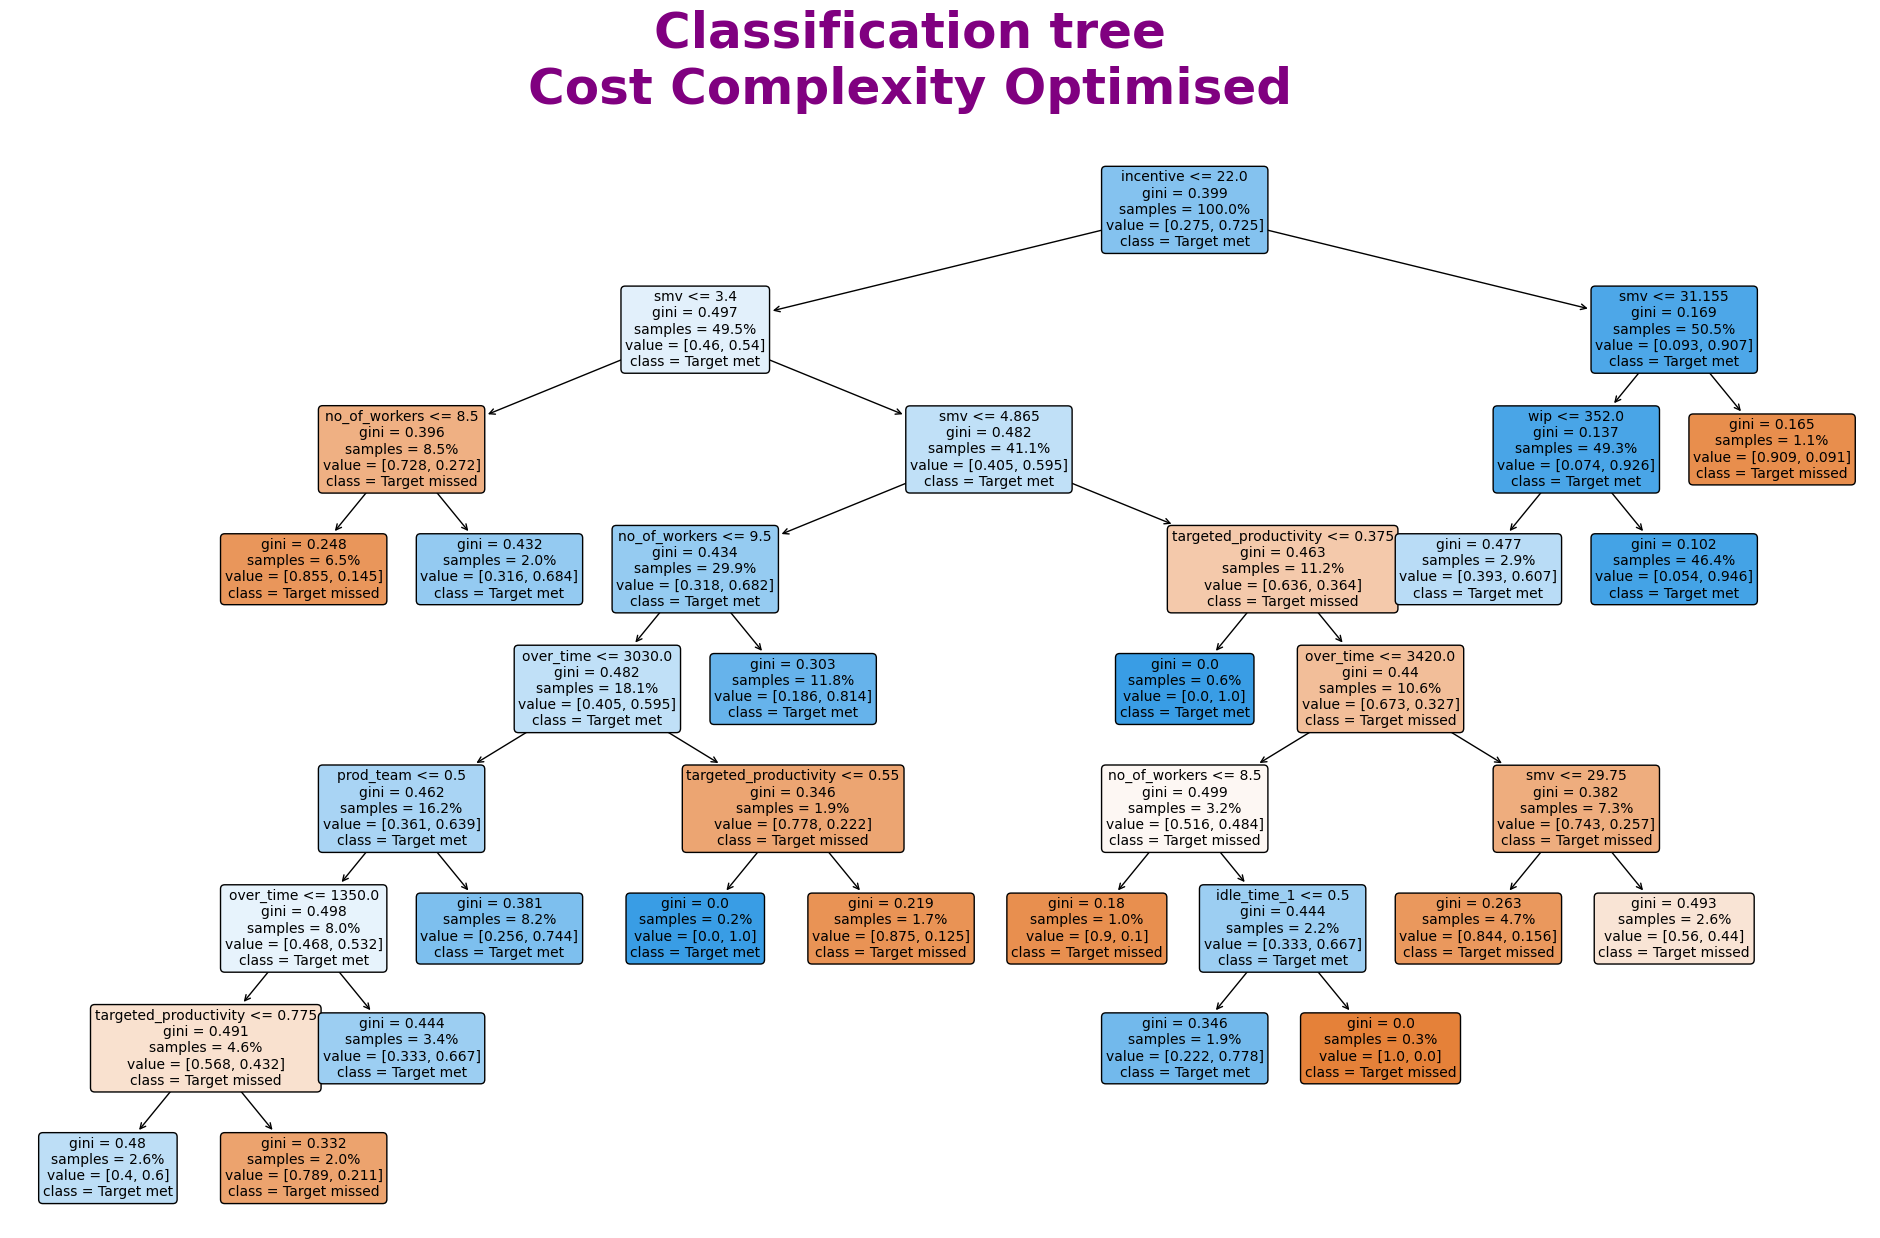

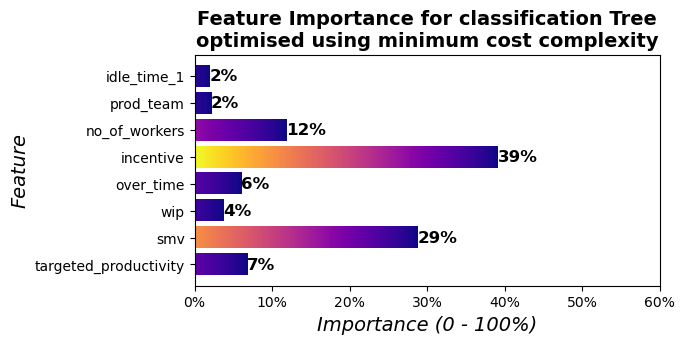

Confusion matrix and accuracy for tree
optimised using minimum cost-complexity
-------------------------------------------------------


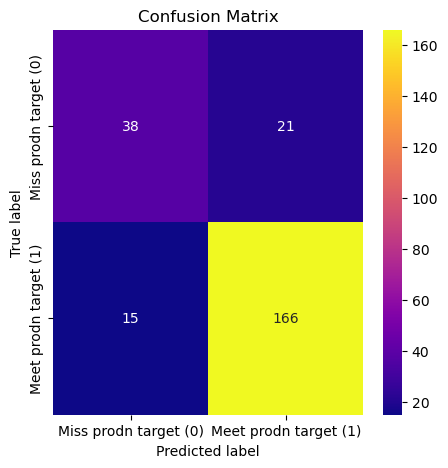

Accuracy: 0.85
Precision: 0.89
Recall: 0.92
Negative predictve value: 0.72
Specificity: 0.64


In [23]:
# Model the difference trees we obtain for differing values of alpha - the cost path
cost_tree = DecisionTreeClassifier(random_state=33)
cost_path = cost_tree.cost_complexity_pruning_path(X_train, y_train)

# create a list of all the trees for given alphas
subtrees = []
for alpha in cost_path.ccp_alphas:
    subtree = DecisionTreeClassifier(random_state=33, ccp_alpha=alpha)
    subtree.fit(X_train, y_train)
    subtrees.append(subtree)

# create list scores for given alpha    
subtree_scores = [subtree.score(X_test, y_test) for subtree in subtrees]

# plot scores against given alphas
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(cost_path.ccp_alphas, subtree_scores, marker='.', markersize=7, mfc='red', mec='None', ls=":",
        label='accuracy score for alpha')
ax.set_title('Minimum Cost Complexity Pruning\n\
plotting accuracy score against given alpha\n\
to identify optimal score and associated alpha')
ax.set_xlabel("Cost Complexity Alpha", fontstyle='italic', size=14, fontweight='demibold')
ax.set_ylabel("Accuracy Score", fontstyle='italic', size=14, fontweight='demibold')
ax.set_xlim([0,0.03])
ax.legend()
plt.show()

# determine optimal alpha / score / tree
alpha_scores = tuple(zip(cost_path.ccp_alphas, subtree_scores))
optimal_ccp_alpha = max(alpha_scores, key=lambda x:x[1])[0]
optimal_ccp_score = max(alpha_scores, key=lambda x:x[1])[1]
print(f"The optimal ccp_alpha for the decision tree is {optimal_ccp_alpha:.4f}\n\
This produces an accuracy score on training data of {optimal_ccp_score:.4f}")

# fit optimal tree
cost_tree_optimal = DecisionTreeClassifier(random_state=33, ccp_alpha=optimal_ccp_alpha)
cost_tree_optimal.fit(X_train, y_train)
print(f"The model produces an accuracy score on test data of: {cost_tree_optimal.score(X_test, y_test)}")

# visualise optimal tree
print("\nVisualisation of optimal classification tree following\n\
minimum cost-complexity optimisation\n\
-------------------------------------")
def plot_CCP_dectree():
    fig, ax = plt.subplots(figsize=(24,14))
    fig.suptitle('Classification tree\nCost Complexity Optimised', color='purple', fontsize=36, fontweight='bold')
    _ = plot_tree(cost_tree_optimal,
                 feature_names = dectree_class.feature_names_in_,
                 class_names = ['Target missed', 'Target met'],
                 filled=True,
                 proportion=True,
                 precision=3,
                 rounded=True,
                 fontsize=10)
    plt.show()
plot_CCP_dectree()

# CHART FEATURE IMPORTANCE
chart_title = "Feature Importance for classification Tree\noptimised using minimum cost complexity"
cost_tree_feat_imp = imp_chart(cost_tree_optimal, chart_title, figsize=(6,3),
                               cmap='plasma', title_color='black',label_color='black')

# generate predictions and print confusion matrix and scores
print("Confusion matrix and accuracy for tree\n\
optimised using minimum cost-complexity\n\
-------------------------------------------------------")

cost_tree_pred = cost_tree_optimal.predict(X_test)
cost_tree_confus = confusion_matrix(list(y_test), list(cost_tree_pred))
    
cm_labels = ['Miss prodn target (0)', 'Meet prodn target (1)']
plot_confusion_matrix(cost_tree_confus, cm_labels, cmap='plasma')

cost_tree_scores = class_scores(cost_tree_confus)

### Comment: Cost-complexity optimisation

- The cost_complexity optimisation improved the accuracy score from 0.833 to 0.85 on test data
- The original tree was restricted to 3 levels and the optimised tree has 8 levels so is actually more complex, but, with greater accuracy.

- The precision of this model on the test data, relative to the simple 3 level model we started with, has improved from 0.88 to 0.89 and the recall has improved from 0.91 to 0.92
- Again on test data, the negative predictive value has improved from from 0.68 to 0.72 and specificity from 0.61 to 0.64 using the cost complexity optimisation relative to the simple 3 level model
- *Classification of both cases has improved in the optimised tree relative to the original 3 level tree. Classification remains more accurate for the positive rather thant he negative data*

##### The optimised tree has 4 addtional important features that did not feature in the simple restricted tree:
- `targeted_productivity`: 7%
- `over_time`:6%
- `prod_team` (whether one of the more productive teams was involved):2%
- `idle_time_1` (whether there was any idle time in production):2%
##### These new importances come with changes to the level of important of the existing features in the original model;
- `incentive` 52% importance in original model reduces to 39% importance in the optimised model
- `smv` (the allocated unit time for production) 36% impportance in the original model reduces to 29% in optimised model
- `wip` (unfinished garments post production run) 5% in original to 4% in optimised
- `no_of_workers` had increased importance in the optimised model from 7% in original model rising to 12% in the optimised model 

## While the model constructed using minimum cost complexity optimisation is more accurate and better at predicting both classes, it is more complex to explain to a lay person as it involves more features and has 8 layers relative to the original model which had 3. 
### This may work against the practicality of using the cost complexity optimised model in the real world, unless we're proposing to build a tool that can take input variables to prediction for a lay person to work with
### I'm not sure the small increase in accuracy achieved in the cost complexity optimised model is worth the risk that this model is misapplied or misunderstood in practical day to day use

## Let's examine whether we can achieve optimality in another way using the Sci-Kit Grid Search tool

## GridSearch Optimisation

I've used minimum cost complexity as a way to optimise the accuracy and classification ability of the tree model.

There are other parameters to the decison tree model that may be useful to examine to see if we can improve the fit of the training data while also mindful of overfitting.

- `max_depth`: the maxmium number of levels in the tree. The initial decision tree model was restricted to 3 levels for simplicity and to limit overfitting. This is certainly easier to explain to people unfamiliar with decsion trees, but, we might consider a greater number of levels in the optimisation given that the cost complexity optimisation suggested a tree with 8 levels.
- `criterion` : there are three criteria that can be used to determine the split at a given node within the classifcation model; 'gini' (impurity), 'information_gain / entropy' and 'log-loss'. Thus far the model's have only used 'gini' - the other criterion might be considered to examine impact on accuracy and transparency.
- `min_samples_split`: the minimum number of observations required to split an internal node. This can avoid overfitting the data to small sample size
- `min_sample_leaf`: Ths parameter specifies the minimum number of observations in a leaf node again preventing leaves with small sample size to avoid overfitting.
- `class_weight`: since the prevalence of class 1 is greater than class 0, this parameter can be used to weight the distribution to achieve balance
- `ccp_alpha`: discussed above, but we can consider a range of alpha values to interplay with the parameters above

Grid Search allows us to input a range of values for each of the parameters discussed above and examine the impact on the model accuracy and interpretability

In [24]:
# define parameters to be used in the search for optimum

params = {'max_depth' : [x for x in range (3,10)],
          'criterion' : ['gini', 'entropy', 'log_loss'],
          'min_samples_split' : [5, 10, 20, 40],
          'min_samples_leaf' : [5, 10, 20, 40],
          'class_weight' : [None, 'balanced'],
          'ccp_alpha' : [x/1000 for x in range(1,11)]}

grid_search = GridSearchCV(cost_tree, param_grid=params)
grid_search.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=33),
             param_grid={'ccp_alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006,
                                       0.007, 0.008, 0.009, 0.01],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 10, 20, 40],
                         'min_samples_split': [5, 10, 20, 40]})

Grid Search Results
-----------------------
The optimum accuracy score from the grid search was: 80.95%
The parameters used to gain this score were:
 {'ccp_alpha': 0.005, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 5}

Visualisation of the grid search optimum tree
------------------------------------------------


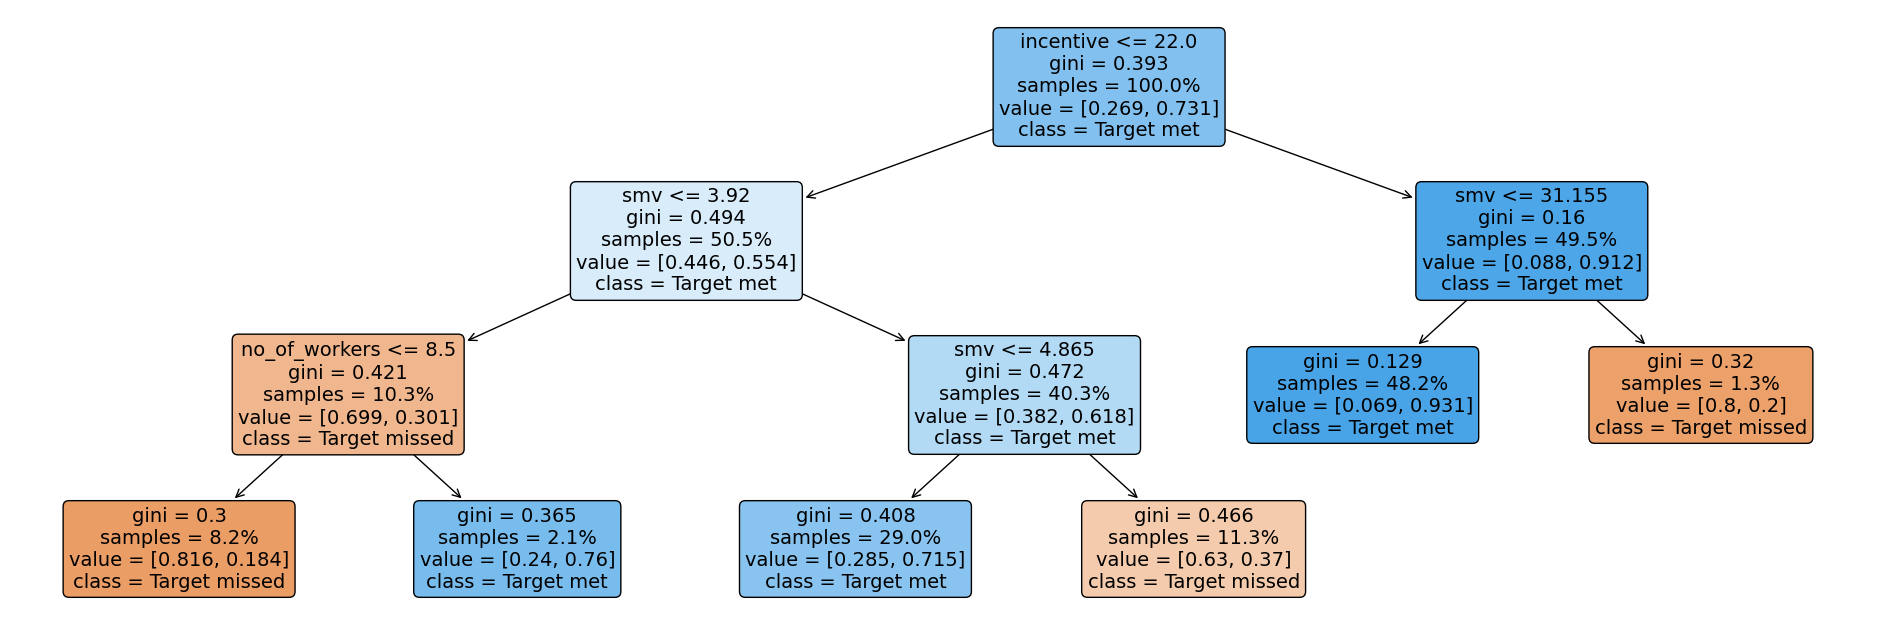

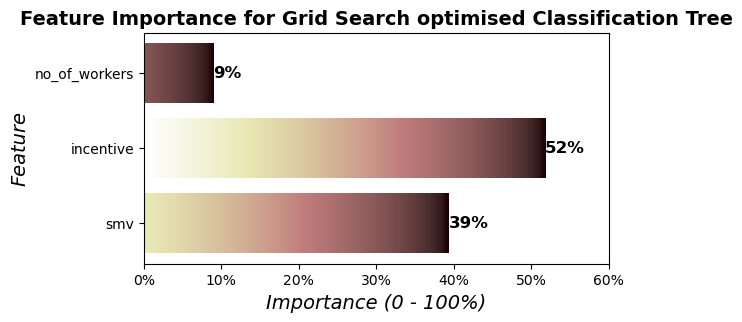

In [25]:
# Determine best attributes from grid search model and visualise optimised tree
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
gs_optm_tree = grid_search.best_estimator_
print(f'Grid Search Results\n\
-----------------------')
print(f'The optimum accuracy score from the grid search was: {best_score:.2%}')
print(f'The parameters used to gain this score were:\n {best_parameters}')
print(f'\nVisualisation of the grid search optimum tree\n\
------------------------------------------------')

plt.figure(figsize=(24,8))
_ = plot_tree(gs_optm_tree,
             feature_names = gs_optm_tree.feature_names_in_,
             class_names = ['Target missed', 'Target met'],
             filled=True,
             proportion=True,
             precision=3,
             rounded=True,
             fontsize=14)
plt.show()

# CHART FEATURE IMPORTANCE
chart_title = "Feature Importance for Grid Search optimised Classification Tree"
gs_optm_feat_imp = imp_chart(gs_optm_tree, chart_title, figsize=(6,3), cmap='pink',
                             title_color='black',label_color='black')

### Generate class level (met / missed target) performance for best estimator from grid search

To obtain the class level performance and match the accuracy results of the best estimator shown above we have to use the same reproducible approach the grid search optimisation used.

This involved folding the data or taking random subsets, given a reproducible random factor (random_state) to create training and test data. The grid search optimisation automatically folds the data 5 time or creates 5 training and test samples. This means we get 5 sets of test data and the accuaracy and class level performance is determined across these 5 folds of the data or 5 test predictions.

I'll recreate the data folds and associated predictions for the best estimator (above) below. 

Confusion matrix and accuracy for tree
optimised using grid search
(Note: there are 5 times as many observations in this dataset as the data is folded 5 times)
-------------------------------------------------------


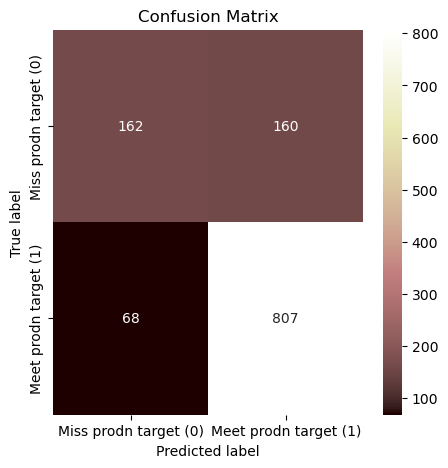

Accuracy: 0.81
Precision: 0.83
Recall: 0.92
Negative predictve value: 0.70
Specificity: 0.50


In [26]:
# recreate nest estimator from grid search including the random state for reproducibility
gs_optm_tree_inc_random = DecisionTreeClassifier(random_state=33, ccp_alpha=0.005, class_weight=None,
                                                 criterion='gini', max_depth=7, min_samples_leaf=5,
                                                 min_samples_split=5)

# Use the folding employed in the Grid Search to create the splits in the feature observation and target variable 
kf = StratifiedKFold()
j=0 # counter variable used to merge folds
# For each fold of data
for train, test in kf.split(X,y):
    
    # Create the subsets of data generated in each fold
    X_tr, X_t = X.iloc[train], X.iloc[test]
    y_tr, y_t = y.iloc[train], y.iloc[test]

    # Fit and Predict the Grid Search Optimised Classifier for each fold
    # create a df summarising the actual observations (df_true) and the predictions across the folds
    gs_optm_tree_inc_random.fit(X_tr, y_tr)
    y_pred = gs_optm_tree_inc_random.predict(X_t)
    
    if j == 0:
        df_pred = pd.DataFrame(y_pred)
        df_true = y_t
        
    else:
        df_pred_curr = pd.DataFrame(y_pred)
        df_true_curr = y_t
        
        df_pred = pd.concat([df_pred, df_pred_curr])
        df_true = pd.concat([df_true, df_true_curr])
    j+=1

# generate confusion matrix and scores
print("Confusion matrix and accuracy for tree\n\
optimised using grid search\n\
(Note: there are 5 times as many observations in this dataset as the data is folded 5 times)\n\
-------------------------------------------------------")

gs_optm_confus = confusion_matrix(df_true, df_pred)
    
cm_labels = ['Miss prodn target (0)', 'Meet prodn target (1)']
plot_confusion_matrix(gs_optm_confus, cm_labels, cmap='pink')

gs_optm_scores = class_scores(gs_optm_confus)

### Comment: Grid Search Optimisation

The model derived using the grid search optimisation parmaters had a lower level of accuracy (0.81) than the original 3 level model (0.83) and the cost complexity model (0.85). I will chart the key differences in summary comparison of the three models below.

### Comparison of feature importance and classification accuracy across the three tree models

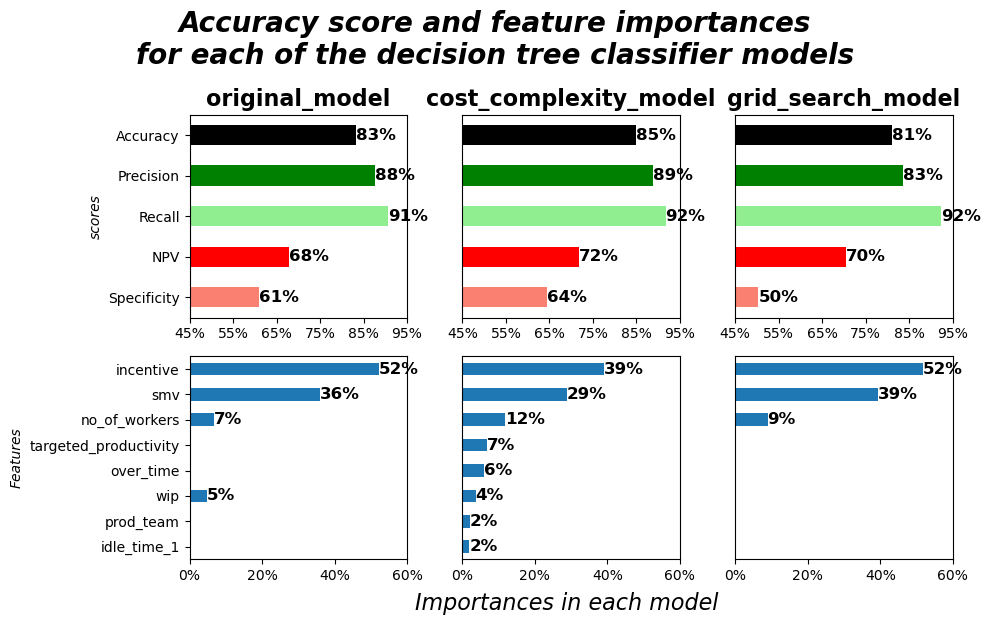

In [27]:
score_labels = ['Accuracy', 'Precision', 'Recall', 'NPV', 'Specificity']
model_names = ['original_model', 'cost_complexity_model', 'grid_search_model']
for e, scores, mod_name in zip(range(3), [dtree_scores, cost_tree_scores, gs_optm_scores], model_names ):
    if e==0:
        df_scores = pd.DataFrame(scores[::-1], columns=[mod_name], index=score_labels[::-1])
    else:
        df_score_row = pd.DataFrame(scores[::-1], columns=[mod_name], index=score_labels[::-1])
        df_scores = pd.concat([df_scores, df_score_row], axis=1)
    

# CREATE DF FOR IMPORTANCES FOR EACH MODEL
df1 = pd.DataFrame({'original_model' : dectree_feat_imp[1]}, index=dectree_feat_imp[0])
df2 = pd.DataFrame({'cost_complexity_model' : cost_tree_feat_imp[1]}, index = cost_tree_feat_imp[0])
df3 = pd.DataFrame({'grid_search_model' : gs_optm_feat_imp[1]} , index = gs_optm_feat_imp[0])

df_comb = pd.concat([df1, df2, df3], axis=1)
df_comb = df_comb.fillna(0)
df_comb.sort_values('cost_complexity_model', inplace=True)

# Create grid chart to compare accuracy, tree levels, feature importances 
num_rows = 2
num_cols = 3

fig , ax = plt.subplots(num_rows, num_cols, figsize=(10,6)) 

# Chart title
fig.suptitle('Accuracy score and feature importances\nfor each of the decision tree classifier models',
             fontsize=20, fontweight='bold', fontstyle='italic')

for i in range(6):
    # creat row and col idx
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # if first row chart accuracy scores
    if row_idx==0:
        df_scores.iloc[:,col_idx].plot(kind='barh', ax=ax[row_idx, col_idx], color=['salmon','red','lightgreen', 'green', 'black'])
        ax[row_idx, col_idx].set_xlim([0.45,0.95])
        ax[row_idx, col_idx].set_title(f"{model_names[col_idx]}", size=16, weight='bold')
        ax[row_idx, col_idx].set_xticks([t/100 for t in range(45,100,10)],
                                        ['45%', "55%", "65%", "75%", "85%", "95%"])
        
        label_score = [f"{x:.0%}" if x!=0  else '' for x in df_scores.iloc[:,col_idx].to_list()]

        # Loop through containers to apply data labels    
        for j in ax[row_idx, col_idx].containers:
            ax[row_idx, col_idx].bar_label(j, labels=label_score, label_type='edge', size=12, fontweight='bold')
        
        # remove y_label from all but intial plt
        if col_idx>0:
            ax[row_idx, col_idx].set_yticks([])
        else:
            ax[row_idx, col_idx].set_ylabel('scores', size=10, style='italic')
            
    # else, chart feature importances for each model
    else:
        chart = df_comb.iloc[:,col_idx].plot(kind='barh', ax=ax[row_idx, col_idx])
        chart.set_xlim([0,0.6])
        chart.set_xticks([t/10 for t in range(0,7,2)], ['0%', "20%", "40%", "60%"])

        label_imp = [f"{x:.0%}" if x!=0  else '' for x in df_comb.iloc[:,col_idx].to_list()]

        # Loop through containers to apply data labels    
        for k in chart.containers:
            chart.bar_label(k, labels=label_imp, label_type='edge', size=12, fontweight='bold')

        # remove y_label from all but intial plt
        if col_idx>0:
            ax[row_idx, col_idx].set_yticks([])
        else:
            ax[row_idx, col_idx].set_ylabel('Features', size=10, style='italic')

# insert text underneath importances as one larger x_label
fig.text(x=0.42, y=-0.02,\
         s='Importances in each model', fontsize=16, fontstyle='italic')
        
plt.tight_layout()
plt.show()

### Comment: Comparison of the three decsion tree classification models
- The original model and grid search optimised model both return a three level model which is easier to interpret and perhaps easier to use than the 8 level model derived from the cost complexity optimisation
- The 8 level cost complexity model had marginally better accuracy than the original 3 level model 0.85 relative to 0.833.
- I'm not sure if the additional accuracy in the cost complexity model improves it's real world value since the model is much more complex to explain and potentially implement since it relies on 8 different features to classify an outcome relative to the original model which utilises 4 features or the grid search optimised model which uses just 3 feature to generate predictions.
- If accuracy was our chief concern we might choose to use the the cost complexity model
- Given the objective may be more around improving targeted and actual productivity of the industry, we might choose the simpler original 3 level model as it is more accurate than the grid search optimised model and possibly easier to explain and put into operatinal practice than the more accurate cost complexity model

### Random Forest Classification

Decision trees can overfit the training data. Ovedrfitting can be thought of as when a model learns the features of the training data over and above the generality of the signals within that data. When a model is overfitted to the training data it can return a lower level of accuracy on the test or unseen data than the accuracy on the training data (that the model is overfitted to).

One way to avoid this overfitting is to create a series of trees and *average* over these trees.

Becuase this method creates many randomly generated trees it is referred to as a *random forest*.

The random aspect to the tree creation process is random in a couple of key ways.

**The observations / Bagging / *Out of Bag* :**
- Random Forect Classifcation (RFC) splits it's training data in a multitude of (random) ways, not necessarily using all data in every tree it creates. This can be understood as something known as **B**ootstrapping  and **AGG**regat**ing** - shortened to bagging.

Because the training data is split in a myriad of random ways it isn't actually necessay to split the dataset into training and test data because the observations left out of any decsion tree generated within the forest can be used to test the accuracy of that tree.

This form of cross validation that uses any left over or unused observations in each tree is known as *"Out of Bag"*.

To start, I'll train the tree using the traing test split we used so far and later I'll use the out of bag method to compare accuracy and classification at the class level.

**The features:**
- A second way RFC improves generality and diversity in the fit of the data is through randomising the *features* it employs in the decision trees generated in the forest. This means that it doesn't necesarily use all the input features in every tree it creates. For example, one random tree might omit `incentive` in the tree it grows, even though we know it's a central feature to the decision trees we've modelled above. This is knwon as *feature bagging*.

**Esimators / Trees grown:**
- A key addtional factor in a random forest classifier is the number of estimators or trees we allow the model to create. I'm going to start with the default for Sci-Kit learn which is for 100 estiamtors.

**Classification using the RFC:**
- Since we're creating 100 random trees, the way we come to define predictions changes. As opposed to taking the prediction from a single tree we take the outcome with the highest probability of occurence across the 100 trees. Somewhat analogous to chossing the most common outcome for a test observation across the 100 decision tress.

**Visualisation**
- Because a RFC uses an ensemble of many (100 to start with) randomly created trees - visualisation is more difficult. We can still extract feature importances to illustrate the extent which features impact classification outcome.

**Initial Random Forest**
The first tree we'll examimne will use the test_train_spit used above with
- maximum tree depth set to 6
- random state (so reproducible)
- 100 trees grown with bagging and feature bagging

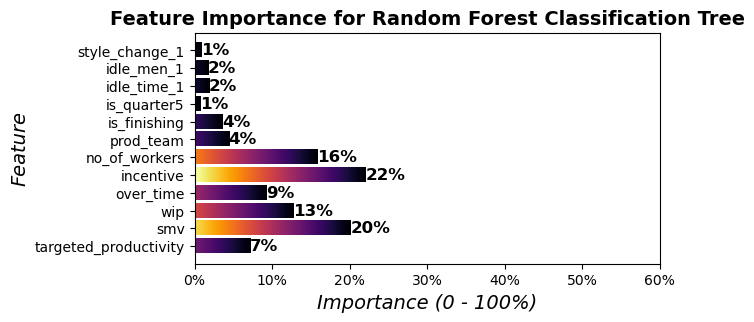

Confusion matrix and accuracy for
Random Forest Classification Tree
-------------------------------------------------------


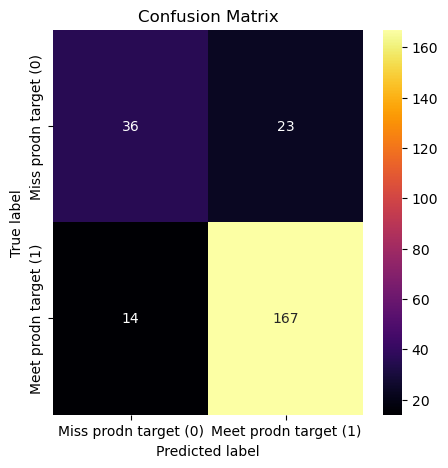

Accuracy: 0.85
Precision: 0.88
Recall: 0.92
Negative predictve value: 0.72
Specificity: 0.61


In [28]:
# Instantiate and fit RFC on training data, predict on test data
randfor_class = RandomForestClassifier(max_depth=6, random_state=33, n_jobs=-1,
                                       n_estimators=100)
randfor_class.fit(X_train, y_train)

# CHART FEATURE IMPORTANCE
chart_title = "Feature Importance for Random Forest Classification Tree"
randfor_class_feat_imp = imp_chart(randfor_class, chart_title, figsize=(6,3), cmap='inferno', 
                                   title_color='black',label_color='black')

# generate predictions and print confusion matrix and scores
print("Confusion matrix and accuracy for\n\
Random Forest Classification Tree\n\
-------------------------------------------------------")

randfor_class_pred = randfor_class.predict(X_test)
randfor_class_confus = confusion_matrix(list(y_test), list(randfor_class_pred))
    
cm_labels = ['Miss prodn target (0)', 'Meet prodn target (1)']
plot_confusion_matrix(randfor_class_confus, cm_labels, cmap='inferno')

randfor_class_scores = class_scores(randfor_class_confus)

### Comment: Random Forest Classifier (RFC)

##### Accuracy and classification
The model achieved 85% accuracy on test data and 92% recall which is comparable to the highest accuracy and recall we achieved so far with the cost complexity decision tree classification model above. The cost complexity decision tree achieved greater precision at 0.89  and greater specificity at 0.64 compared to 0.88 and 0.61 respectively with the RFC.

##### Feature importance
The random forest classifier used all 12 features in the training data. The only other model that used nearly as many was the cost complexity optimised decison tree and this used 8 features. It remains the case that the two most important features are `incentive` and `smv`.

### Let's examine the RFC when we use out of the bag cross validation
A key start point to this is that we train the model on the whole dataset knowing different tress will utilise data and features to varying degrees and any unused observations will be used to validate predictions.

The out of the bag model accuracy is: 81.95%


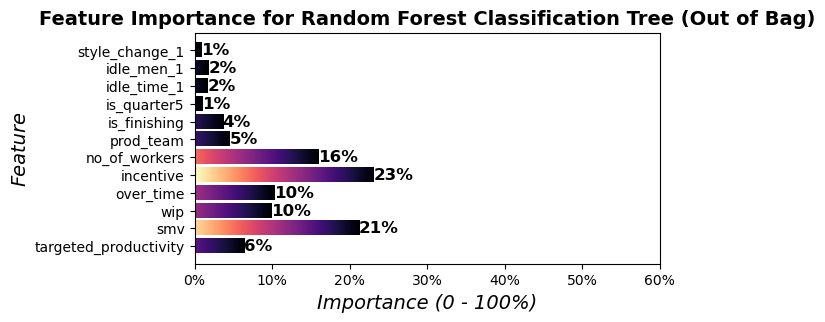

In [29]:
# Instantiate, fit RFC using OOB
randfor_oob = RandomForestClassifier(max_depth=6, random_state=33, n_jobs=-1,
                                     n_estimators=100, oob_score=True, warm_start=True)
randfor_oob.fit(X,y)
print(f"The out of the bag model accuracy is: {randfor_oob.oob_score_:.2%}")

# CHART FEATURE IMPORTANCE
chart_title = "Feature Importance for Random Forest Classification Tree (Out of Bag)"
randfor_oob_feat_imp = imp_chart(randfor_oob, chart_title, figsize=(6,3), cmap='magma', title_color='black',label_color='black')

We need to look at the out of the bag decision function for the RFC to determine the probability prediction for every observation when that particular observation was left out of the bag and used in cross validation. This is analogous to generating predictions on test data.

Confusion matrix and accuracy for
Random Forest Classification Tree (Out of bag) cross validation
(The supporting number of observations will differ to that used in static test data)
-------------------------------------------------------


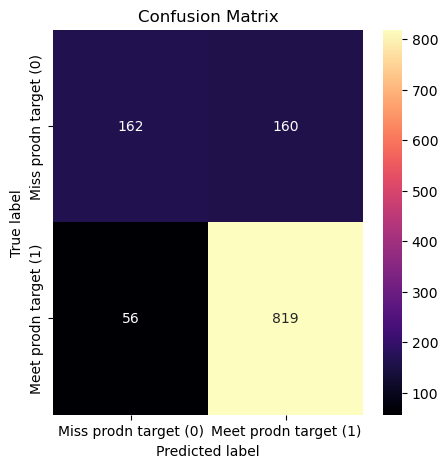

Accuracy: 0.82
Precision: 0.84
Recall: 0.94
Negative predictve value: 0.74
Specificity: 0.50


In [30]:
# Generate OOB predictions for each observation
oob_preds = randfor_oob.oob_decision_function_
oob_class_df = pd.DataFrame(oob_preds, columns=[0,1])
oob_class_df['y_pred'] = oob_class_df.idxmax(axis=1)
oob_class_df['y_test'] = y


# Visualise confusion matrix and scores for OOB cross validation
print("Confusion matrix and accuracy for\n\
Random Forest Classification Tree (Out of bag) cross validation\n\
(The supporting number of observations will differ to that used in static test data)\n\
-------------------------------------------------------")

randfor_oob_confus = confusion_matrix(oob_class_df['y_test'], oob_class_df['y_pred'])
    
cm_labels = ['Miss prodn target (0)', 'Meet prodn target (1)']
plot_confusion_matrix(randfor_oob_confus, cm_labels, cmap='magma')

randfor_oob_scores = class_scores(randfor_oob_confus)

### Comment: Out of bag cross validation
The out of the bag cross validated random forest had lower level of accuracy than the initial random forest which was not cross validated. 

### Let's see if we can use Randomised Search to optimise this random forest classification with its out of the bag cross validation

This is a less computational expensive way of determining pararmeters that impact accuracy, though may miss accuracy by 

In [32]:
# define parameters to be used in the search for optimum

oob_params = {'n_estimators' : [50, 100, 200],
              'max_depth' : [x for x in range (6,10)],
              'criterion' : ['gini', 'entropy', 'log_loss'],
              'min_samples_split' : [2, 4, 8],
              'min_samples_leaf' : [2, 4, 8],
              'max_samples' : [0.7, 0.75, 0.8]}

grid_search_randfor_oob = GridSearchCV(randfor_oob, param_grid=oob_params)
grid_search_randfor_oob.fit(X,y)

GridSearchCV(estimator=RandomForestClassifier(max_depth=6, n_jobs=-1,
                                              oob_score=True, random_state=33,
                                              warm_start=True),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [6, 7, 8, 9],
                         'max_samples': [0.7, 0.75, 0.8],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100, 200]})

In [33]:
grid_search_randfor_oob.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_samples': 0.8,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 200}

Grid search results for random forest classifier using out of bag cros validation
----------------------------------------------------------------------------------------
The optimum accuracy score from the grid search was: 80.20%
The parameters used to gain this score were:
 {'criterion': 'gini', 'max_depth': 9, 'max_samples': 0.8, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 200}


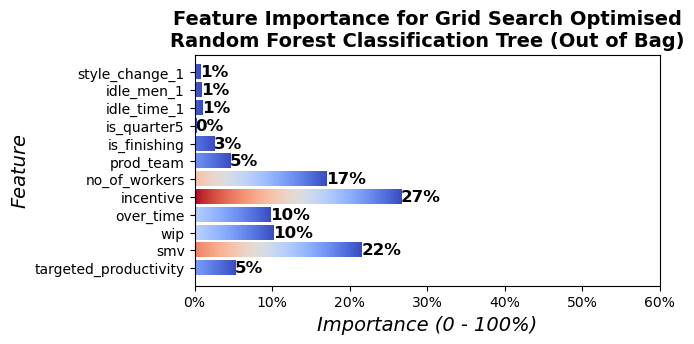

Confusion matrix and accuracy for
Random Forest Classification Tree
Grid Search Optimised using "Out of bag" cross validation
(The supporting number of observations will differ to that used in static test data)
-------------------------------------------------------


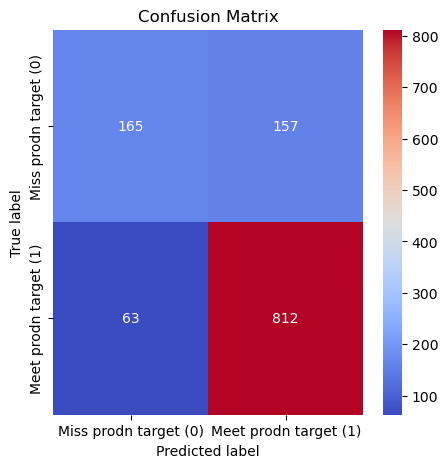

Accuracy: 0.82
Precision: 0.84
Recall: 0.93
Negative predictve value: 0.72
Specificity: 0.51


In [35]:
# Determine best attributes from grid search model and visualise optimised tree
rfc_best_score = grid_search_randfor_oob.best_score_
rfc_best_parameters = grid_search_randfor_oob.best_params_
print(f'Grid search results for random forest classifier using out of bag cros validation\n\
----------------------------------------------------------------------------------------')
print(f'The optimum accuracy score from the grid search was: {rfc_best_score:.2%}')
print(f'The parameters used to gain this score were:\n {rfc_best_parameters}')

# instantiate optimal parameters for RFC (OOB) including random state
rfc_gs_optm_tree = RandomForestClassifier(criterion= 'gini', max_depth = 9, max_samples = 0.8,
                                          min_samples_leaf = 8, min_samples_split = 2, n_estimators = 200,
                                          oob_score=True, warm_start=True)
rfc_gs_optm_tree.fit(X,y)

# CHART FEATURE IMPORTANCE
chart_title = "Feature Importance for Grid Search Optimised\n\
Random Forest Classification Tree (Out of Bag)"
rfc_gs_optm_feat_imp = imp_chart(rfc_gs_optm_tree, chart_title, figsize=(6,3), cmap='coolwarm',
                                 title_color='black',label_color='black')

# Generate OOB predictions for each observation using OOB decsion function
gs_optm_oob_preds = rfc_gs_optm_tree.oob_decision_function_
gs_optm_oob_class_df = pd.DataFrame(gs_optm_oob_preds, columns=[0,1])
gs_optm_oob_class_df['y_pred'] = gs_optm_oob_class_df.idxmax(axis=1)
gs_optm_oob_class_df['y_test'] = y

# Visualise confusion matrix and scores for OOB cross validation
print("Confusion matrix and accuracy for\n\
Random Forest Classification Tree\n\
Grid Search Optimised using \"Out of bag\" cross validation\n\
(The supporting number of observations will differ to that used in static test data)\n\
-------------------------------------------------------")

gs_optm_oob_confus = confusion_matrix(gs_optm_oob_class_df['y_test'], gs_optm_oob_class_df['y_pred'])
    
cm_labels = ['Miss prodn target (0)', 'Meet prodn target (1)']
plot_confusion_matrix(gs_optm_oob_confus, cm_labels, cmap='coolwarm')

rfc_gs_optm_scores = class_scores(gs_optm_oob_confus)

### Comment: Grid Search Optimised RFC (OOB cross validated)
The grid search optimised random forest model, validated using out of the bag cross validation, gave higher level of accuracy (0.82) relative to earlier random forest OOB model.

Let's see how scores compare acorss the 6 models investigated so far

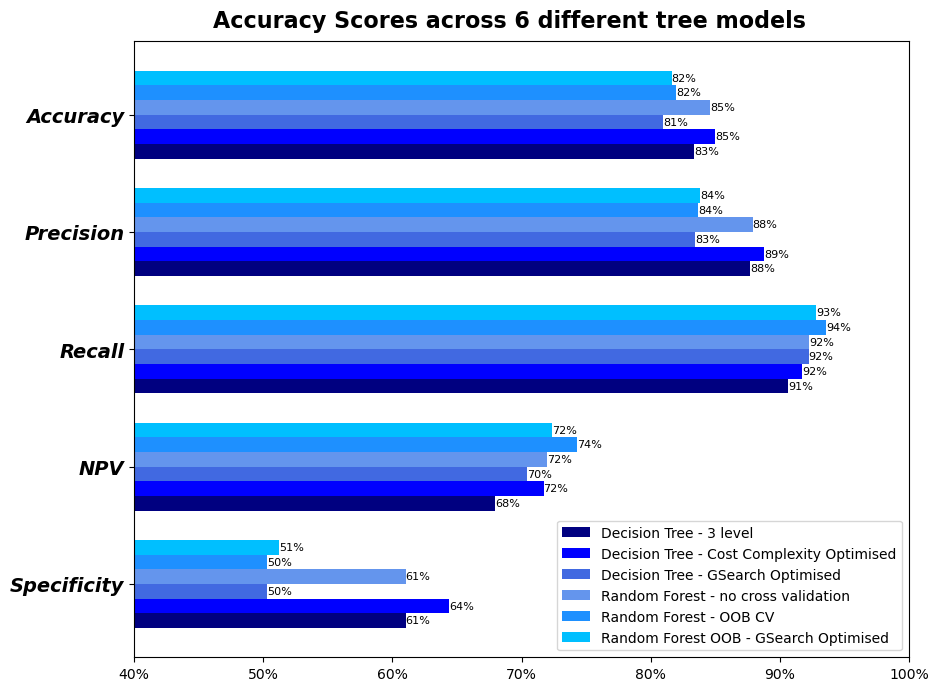

In [36]:
#  Buid df from model scores above (score_list)
score_labels = ['Accuracy', 'Precision', 'Recall', 'NPV', 'Specificity']
model_names = ['Decision Tree - 3 level', 'Decision Tree - Cost Complexity Optimised',
               'Decision Tree - GSearch Optimised', 'Random Forest - no cross validation',
               'Random Forest - OOB CV', 'Random Forest OOB - GSearch Optimised']
score_list = [dtree_scores, cost_tree_scores, gs_optm_scores, randfor_class_scores,
              randfor_oob_scores, rfc_gs_optm_scores]
for e, scores, mod_name in zip(range(6), score_list , model_names ):
    # reverse scores and labels to ensure accuracy reported first 
    if e==0:
        df_all_scores = pd.DataFrame(scores[::-1], columns=[mod_name], index=score_labels[::-1])
    else:
        df_score_row = pd.DataFrame(scores[::-1], columns=[mod_name], index=score_labels[::-1])
        df_all_scores = pd.concat([df_all_scores, df_score_row], axis=1)


# CREATE DF FOR IMPORTANCES FOR EACH MODEL
df4 = pd.DataFrame({'Random_Forest_train_test_split' : randfor_class_feat_imp[1]} ,
                   index = randfor_class_feat_imp[0])
df5 = pd.DataFrame({'Random_Forest_OOB' : randfor_oob_feat_imp[1]} ,
                   index = randfor_oob_feat_imp[0])
df6 = pd.DataFrame({'Random_Forest_(grid_optimised)' : rfc_gs_optm_feat_imp[1]} ,
                   index = rfc_gs_optm_feat_imp[0])

df_imps = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)
df_imps = df_comb.fillna(0)
df_imps.sort_values('cost_complexity_model', inplace=True)

# plot scores across the 6 models
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('Accuracy Scores across 6 different tree models', y=0.92, fontweight='bold', fontsize=16)
width=0.75
colors_green_red = ['green', 'lightgreen', 'aquamarine', 'red', 'salmon', 'mistyrose']
colors = ['navy', 'blue', 'royalblue', 'cornflowerblue', 'dodgerblue', 'deepskyblue']
score_chart = df_all_scores.plot(kind='barh', ax=ax, color=colors, width=width)
score_chart.set_xlim([0.4,1])
score_chart.set_xticks( [x/10 for x in range(4,11)], [f"{x/10:.0%}" for x in range(4,11)])
score_chart.set_yticks(range(5), score_labels[::-1], size=14, style='italic', weight='bold')

# score_labels = [f"{x:.0%}" if x!=0  else '' for x in df_comb.iloc[:,col_idx].to_list()]
# Loop through containers to apply data labels    
for s in score_chart.containers:
    score_chart.bar_label(s, label_type='edge', size=8, fmt='{:.0%}')


## Conclusion:

The cost complexity pruned (optimised) decision tree had the highest level of accuracy, precision and specificity of any of the 6 models considered.

This cost complexity decision tree was an 8 level model that is perhaps a little more challenging to explain to non-technical audiences. Nonetheless it contains powerful insights within it that could help business improve decsion making around productivity.

By contrast the simple 3 level tree we started with is a a more pruned (less grown) version of the cost complexity tree and is easier to relate to a non-technical audience while illustrating key points.

The simple 3 level tree (below) is also only marginally less accurate that the the multi-layered cost complexity tree (0.83 vs 0.85).

### Insights from the simple 3 level decision tree

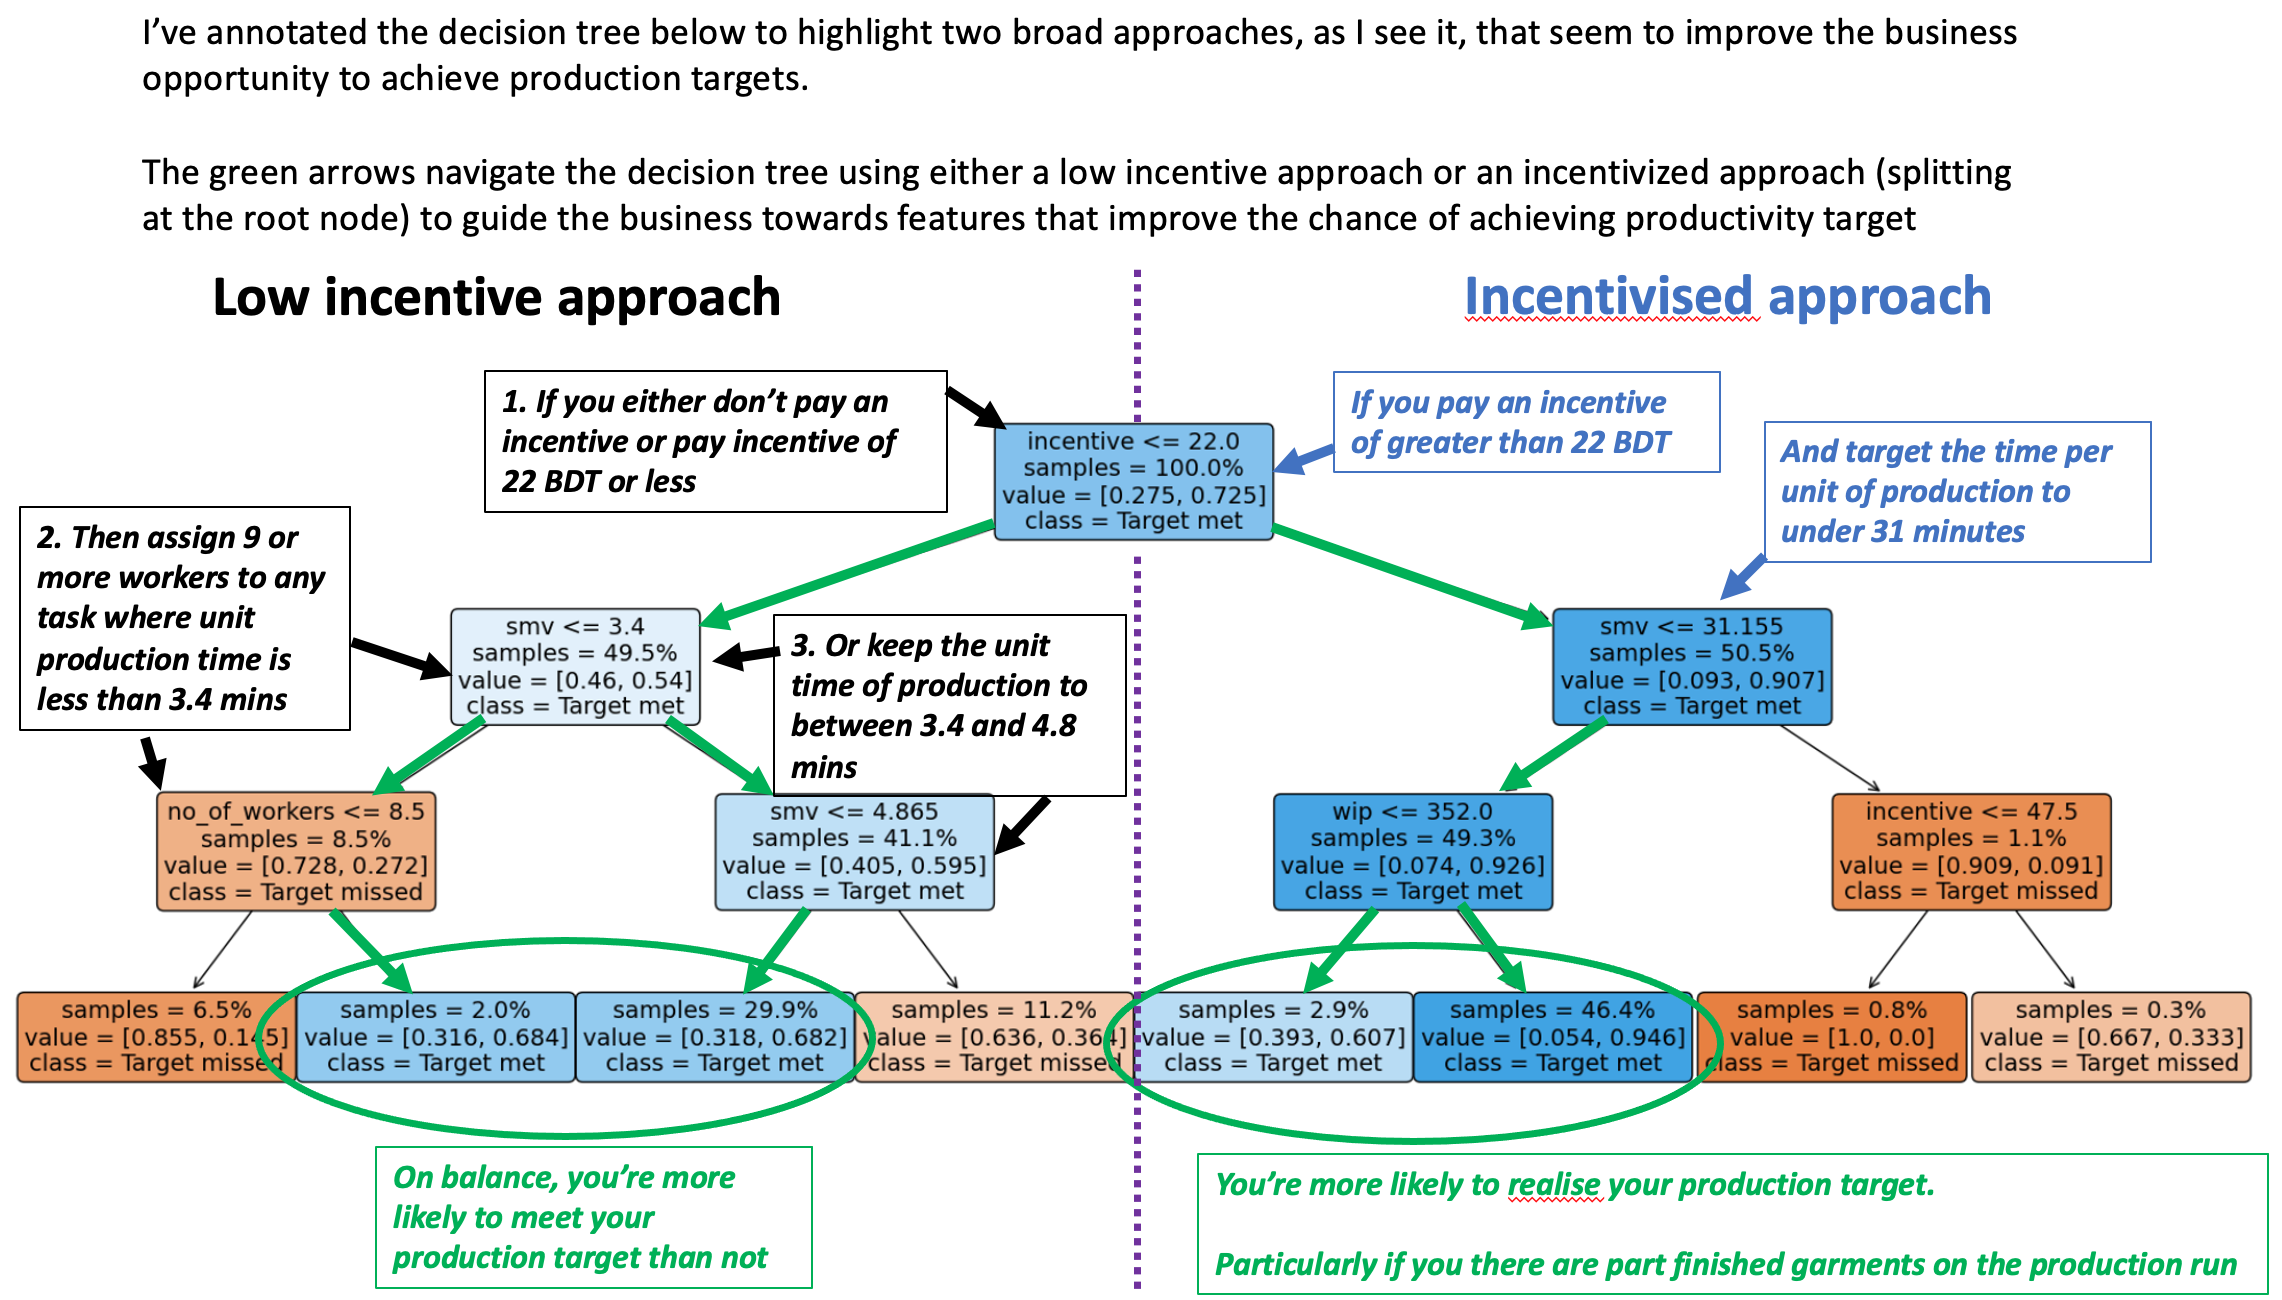

It is also interesting to me that the simple 3 level tree we started with has broadly comparable levels of accuracy to the random forest models considered later on. In this instance it seems that a simple model fit works just as well as some of the more complex models.